In [126]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [127]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import sys

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=260)

In [128]:
# path = '/media/ke/8tb_part2/FSL_work/all_info/CVR02_1299_20191219/BOLD/CVR02_BOLD_20191219100720_t479220.nii'
# m_path = '/media/ke/8tb_part2/FSL_work/all_info/CVR02_1299_20191219/BOLD_processed/CVR02_BOLD_20191219100720_t479220_timed_demotioned_brain_mask.nii.gz'
# path = '/media/ke/8tb_part2/FSL_work/all_info/CVR01_1295_20191218/BOLD/CVR01_BOLD_20191218132745.nii'
# m_path = '/media/ke/8tb_part2/FSL_work/all_info/CVR01_1295_20191218/BOLD_processed/CVR01_BOLD_20191218132745_timed_demotioned_brain_mask.nii.gz'
path = '/media/ke/8tb_part2/FSL_work/all_info/CVR002_1299_20191219/BOLD/CVR002_BOLD_20191219100720_t479220.nii'
m_path = '/media/ke/8tb_part2/FSL_work/all_info/CVR002_1299_20191219/BOLD_processed/CVR002_BOLD_20191219100720_t479220_timed_demotioned_brain_mask.nii.gz'
# path = '/media/ke/8tb_part2/FSL_work/all_info/WH1755_1306_20200102/BOLD/WH1755_BOLD_20200102114446_t479220.nii'
# m_path = '/media/ke/8tb_part2/FSL_work/all_info/WH1755_1306_20200102/BOLD_processed/WH1755_BOLD_20200102114446_t479220_timed_demotioned_brain_mask.nii.gz'
nii_mask = nib.load(m_path)
nii_img = nib.load(path)

In [129]:
nii = np.array(nii_img.dataobj)
nii = nii[:,:,:, 3:]
nii_range = np.zeros((64,64,25))
nii_max = np.zeros((64,64,25))
nii_min = np.zeros((64,64,25))
nii_med = np.zeros((64,64,25))
print(nii.shape)
for i in range(nii.shape[0]):
    for j in range(nii.shape[1]):
        for k in range(nii.shape[2]):
#             print(nii[i][j][k].shape)
#             print(nii[i][j][k].max(), nii[i][j][k].min())
#             print(nii[i][j][k].max() - nii[i][j][k].min())
            nii_range[i][j][k] = nii[i][j][k].max() - nii[i][j][k].min()
            nii_max[i][j][k] = nii[i][j][k].max()
            nii_min[i][j][k] = nii[i][j][k].min()
            nii_med[i][j][k] = np.median(nii[i][j][k])
#             print(i, j, k, condense[i][j][k])
#             break
print(nii_range.shape)
# print(condense)

(64, 64, 25, 317)
(64, 64, 25)


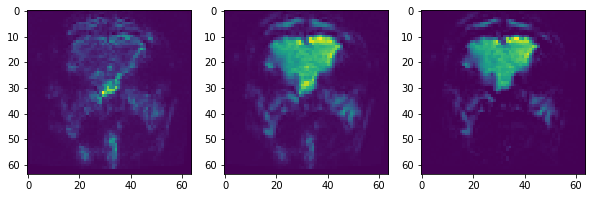

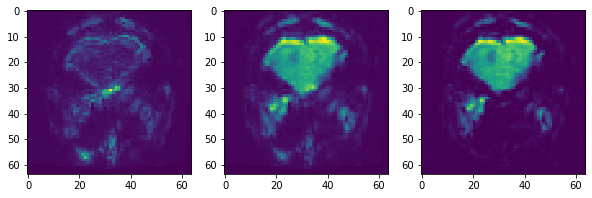

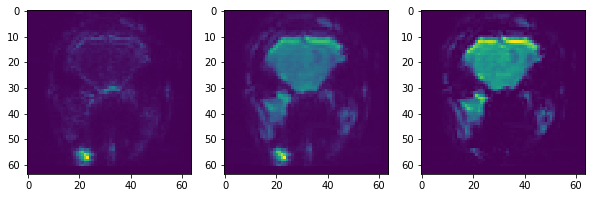

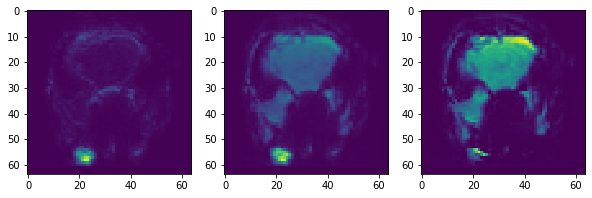

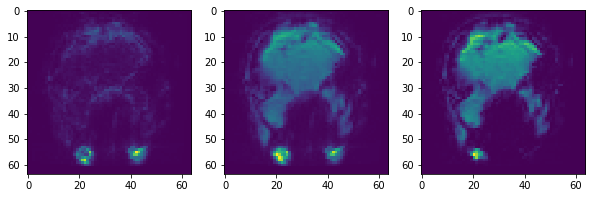

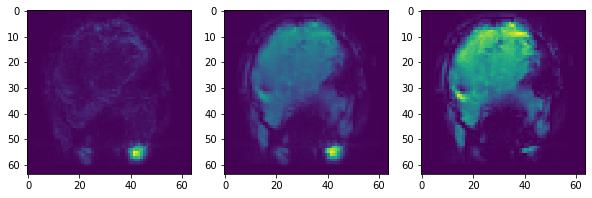

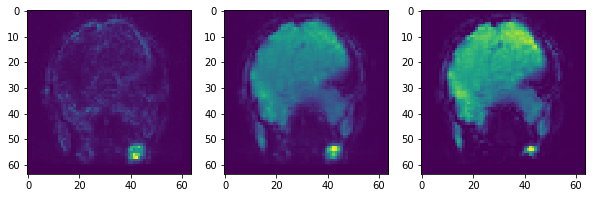

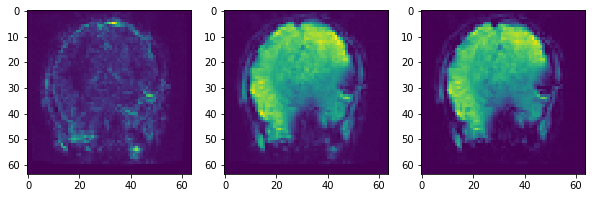

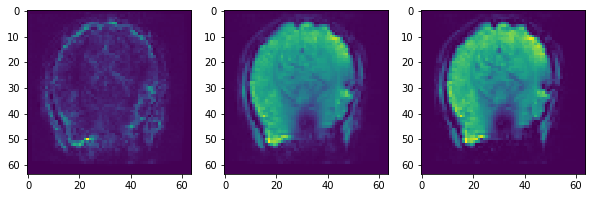

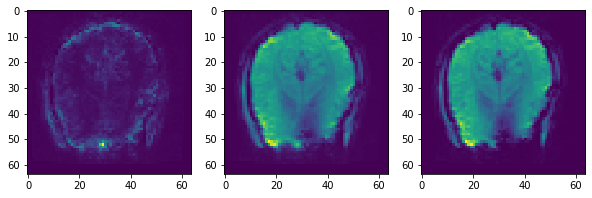

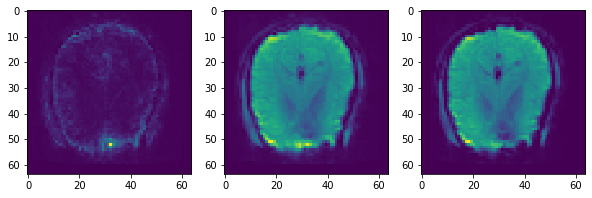

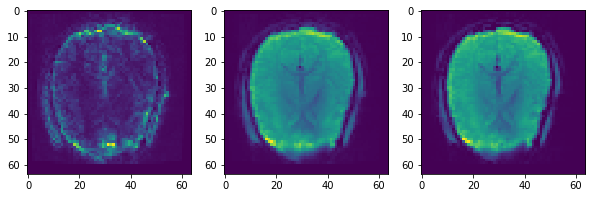

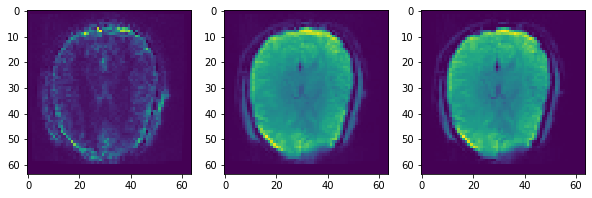

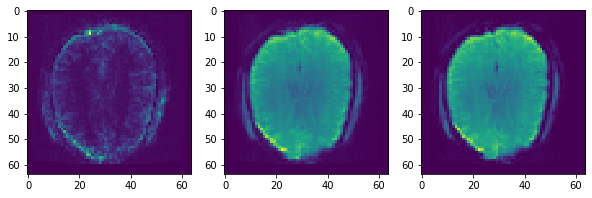

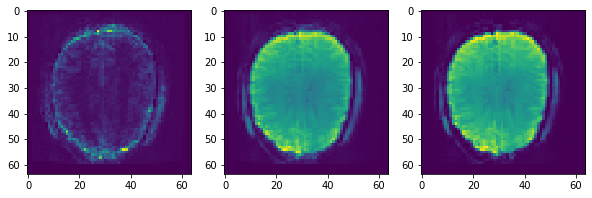

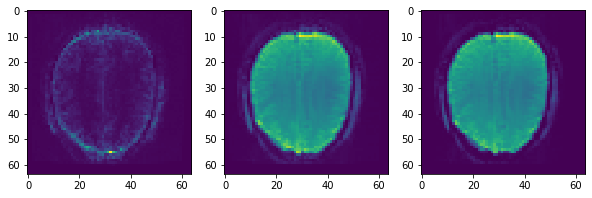

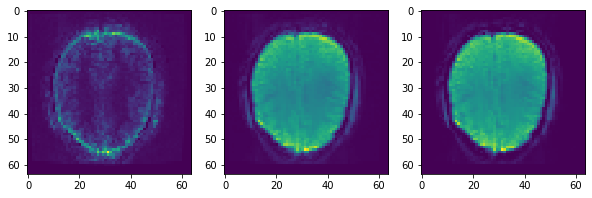

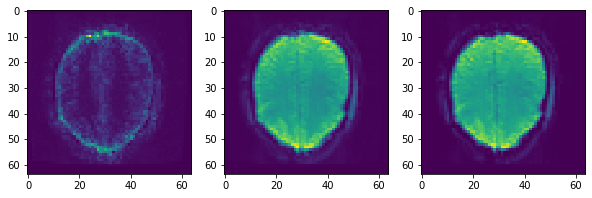

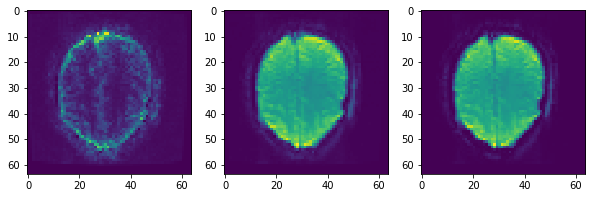

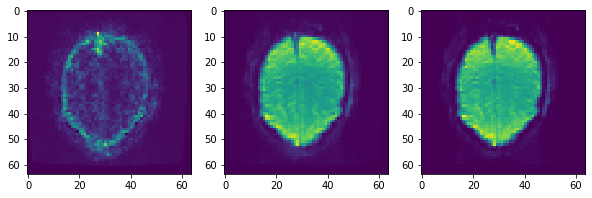

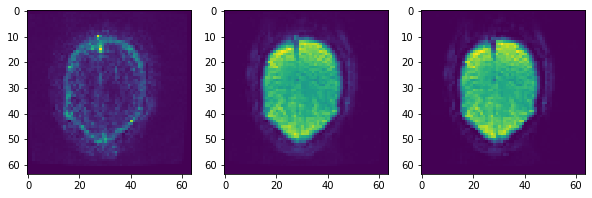

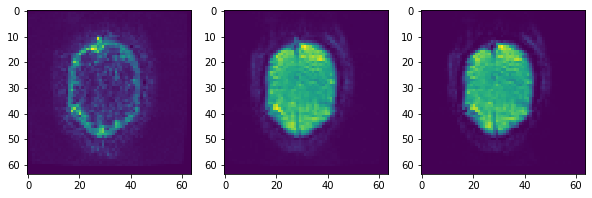

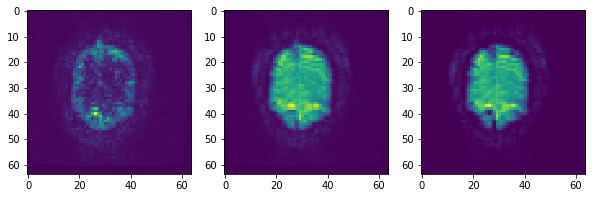

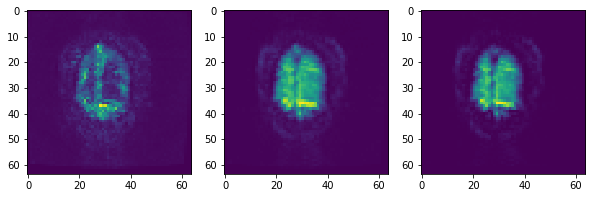

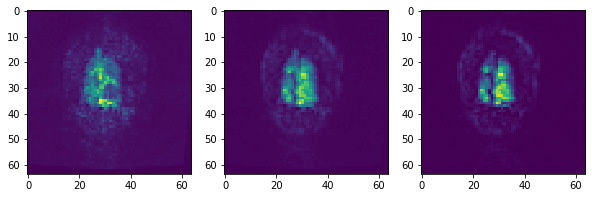

In [130]:
for i in range(nii_med.shape[2]):
    fig, axes = plt.subplots(1, 3, figsize=(10,5))
    axes[0].imshow(nii_range[:,:,i].T)
    axes[1].imshow(nii_max[:,:,i].T)
    axes[2].imshow(nii_min[:,:,i].T)
    plt.show()
plt.close()

In [131]:
# for i in range(nii_range.shape[2]):
#     fig, axes = plt.subplots(1, 2, figsize=(10,5))
#     max_int = nii_max[:,:,i].max()
#     min_int = nii_min[:,:,i].min()
#     im = axes[0].imshow(nii_max[:,:,i].T, vmin=min_int, vmax=max_int)
#     im = axes[1].imshow(nii_min[:,:,i].T, vmin=min_int, vmax=max_int)
#     fig.colorbar(im, ax=axes.ravel().tolist())
#     plt.show()
# plt.close()

In [132]:
from nipy import labs
import cv2 as cv

In [133]:
def grow_mask(mask):
    temp_mask = np.zeros_like(mask)
    for z in range(mask.shape[-1]):
        mask_part = np.zeros_like(mask[:,:,z])
        labels, stats = cv.connectedComponentsWithStats(np.uint8(mask[:,:,z]), 4)[1:3]
#         print(stats)
        largest_label = 1 + np.argmax(stats[1:, cv.CC_STAT_AREA])
        mask_part[labels == largest_label] = 1
        temp_mask[:,:,z] = mask_part.astype(int)
        
    new_mask = np.zeros_like(mask)
    for i in range(len(mask)):
        for j in range(len(mask[i])):
            for k in range(len(mask[i][j])):
                if k == len(mask[i][j])-1 and mask[i][j][k] == 1:
                    new_mask[i-1][j-1][k] = 1
                    new_mask[i-1][j][k] = 1
                    new_mask[i-1][j+1][k] = 1
                    new_mask[i][j-1][k] = 1
                    new_mask[i][j][k] = 1
                    new_mask[i][j+1][k] = 1
                    new_mask[i+1][j-1][k] = 1
                    new_mask[i+1][j][k] = 1
                    new_mask[i+1][j+1][k] = 1
                    
                elif temp_mask[i][j][k] == 1:
#                         new_mask[i-1][j-1][k-1] = 1
                    new_mask[i-1][j-1][k] = 1
#                         new_mask[i-1][j-1][k+1] = 1
#                         new_mask[i-1][j][k-1] = 1
                    new_mask[i-1][j][k] = 1
#                         new_mask[i-1][j][k+1] = 1
#                         new_mask[i-1][j+1][k-1] = 1
                    new_mask[i-1][j+1][k] = 1
#                         new_mask[i-1][j+1][k+1] = 1
#                         new_mask[i][j-1][k-1] = 1
                    new_mask[i][j-1][k] = 1
#                         new_mask[i][j-1][k+1] = 1
#                         new_mask[i][j][k-1] = 1
                    new_mask[i][j][k] = 1
#                         new_mask[i][j][k+1] = 1
#                         new_mask[i][j+1][k-1] = 1
                    new_mask[i][j+1][k] = 1
#                         new_mask[i][j+1][k+1] = 1
#                         new_mask[i+1][j-1][k-1] = 1
                    new_mask[i+1][j-1][k] = 1
#                         new_mask[i+1][j-1][k+1] = 1
#                         new_mask[i+1][j][k-1] = 1
                    new_mask[i+1][j][k] = 1
#                         new_mask[i+1][j][k+1] = 1
#                         new_mask[i+1][j+1][k-1] = 1
                    new_mask[i+1][j+1][k] = 1
#                         new_mask[i+1][j+1][k+1] = 1
    return new_mask

In [134]:
fsl_mask = np.array(nii_mask.dataobj)
print(fsl_mask.shape)
# mask_3d = np.zeros((64,64,25))

# for i in range(nii.shape[0]):
#     for j in range(nii.shape[1]):
#         for k in range(nii.shape[2]):
#             mask_3d[i][j][k] = fsl_mask[i][j][k].max()

# for i in range(nii_range.shape[2]):
#     plt.imshow(fsl_mask[:,:,i].T)
#     plt.show()
# plt.close()

(64, 64, 25)


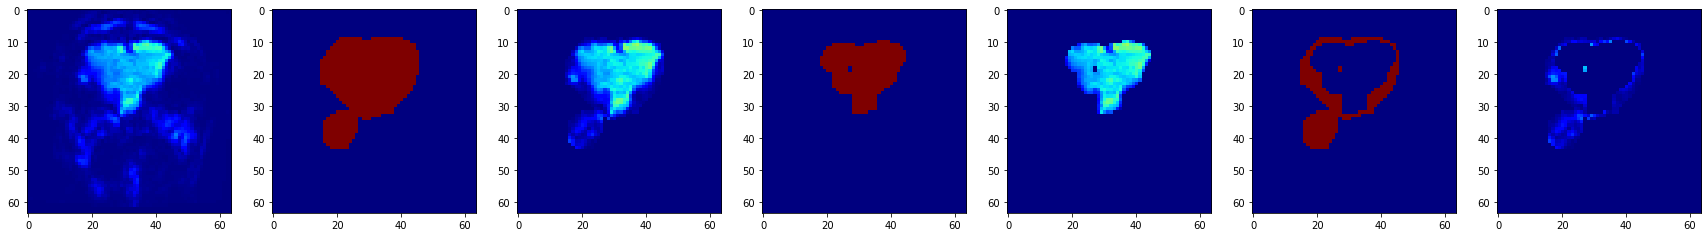

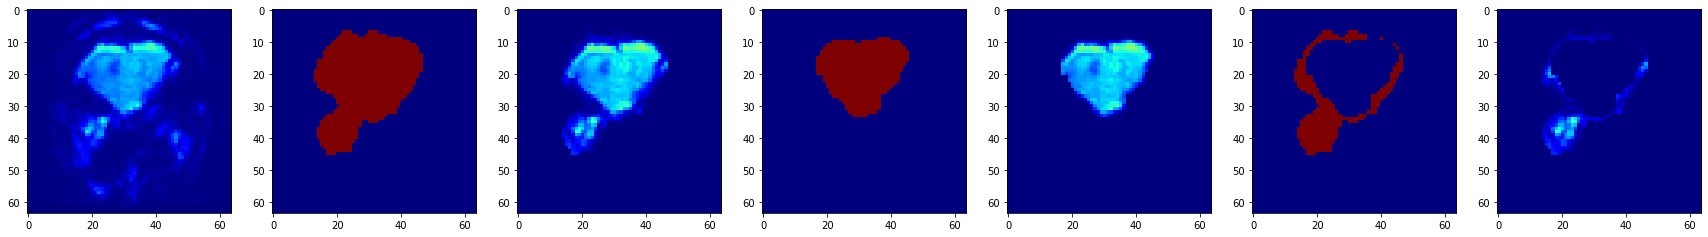

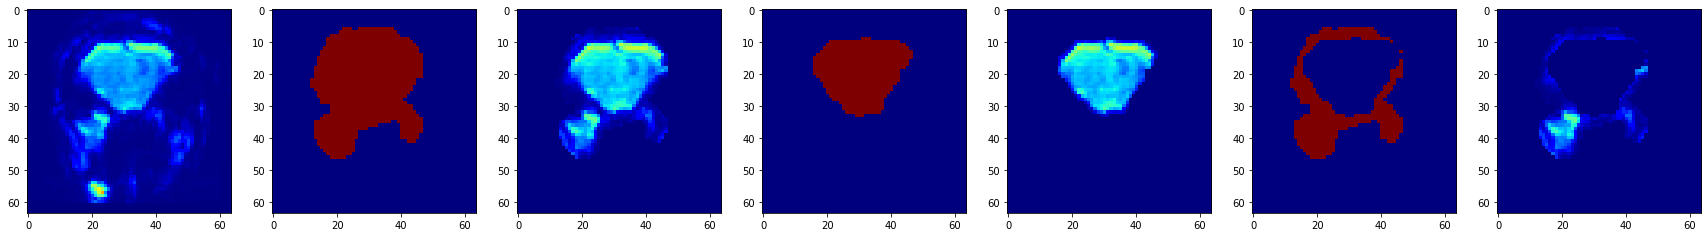

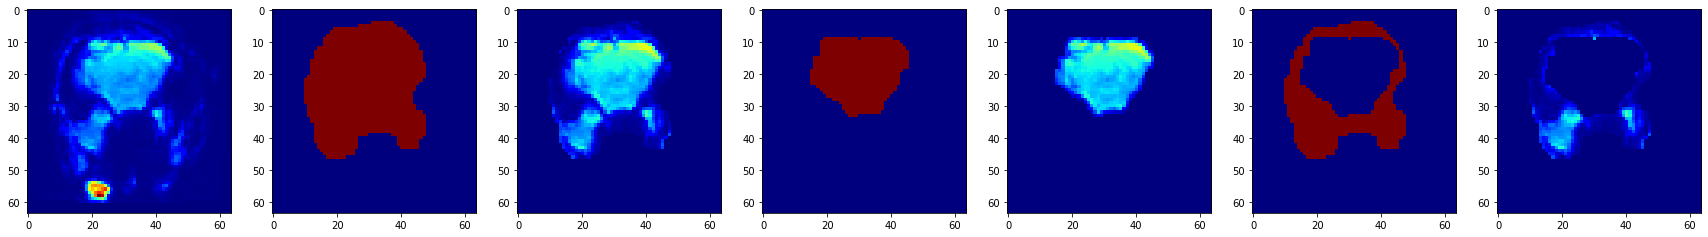

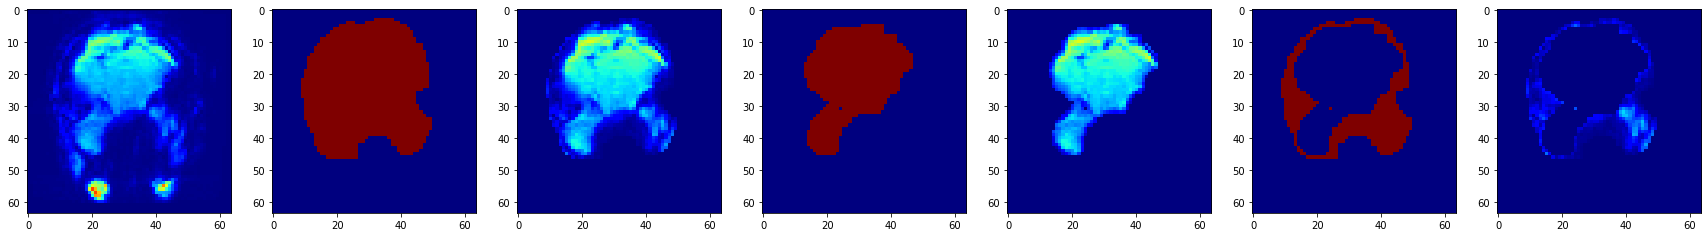

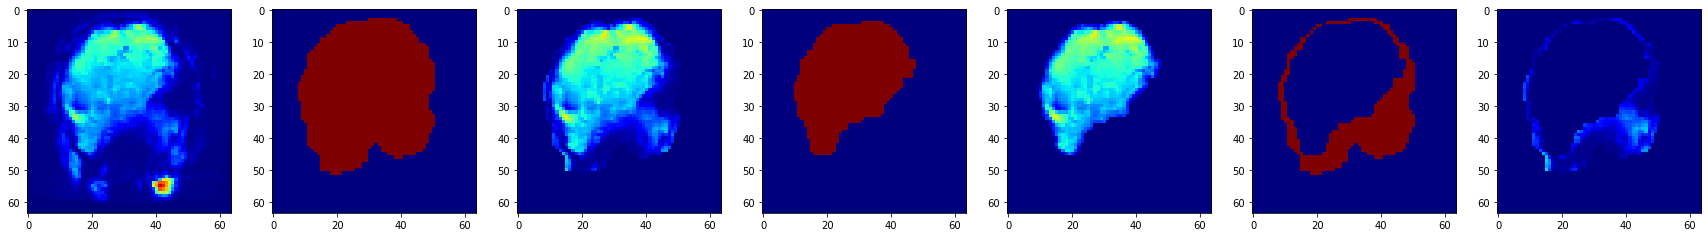

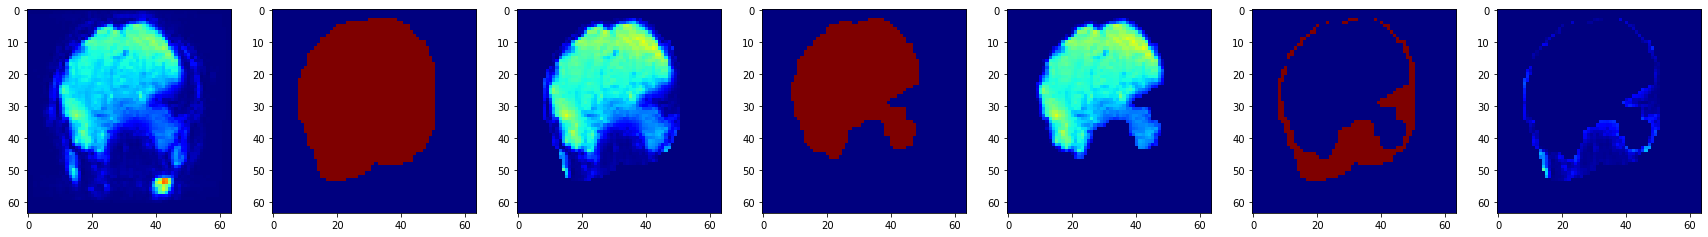

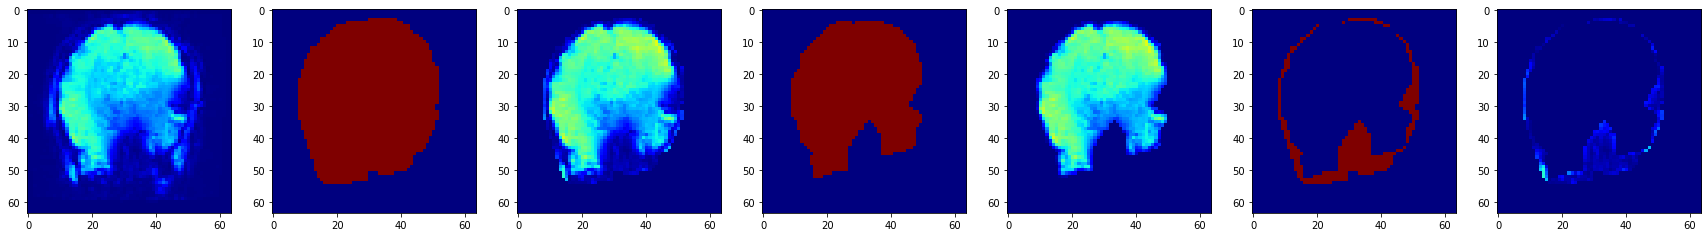

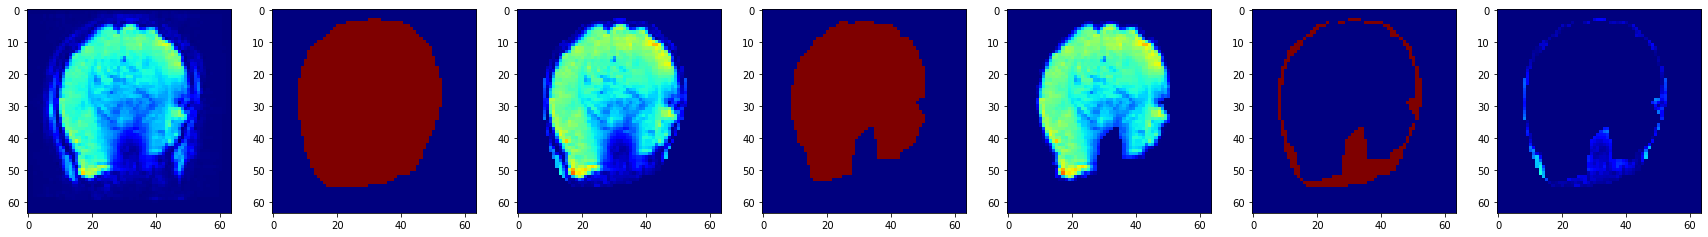

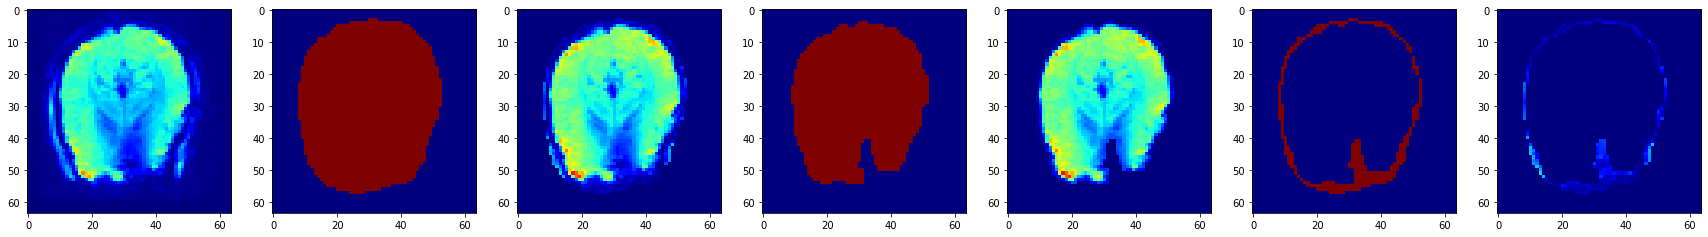

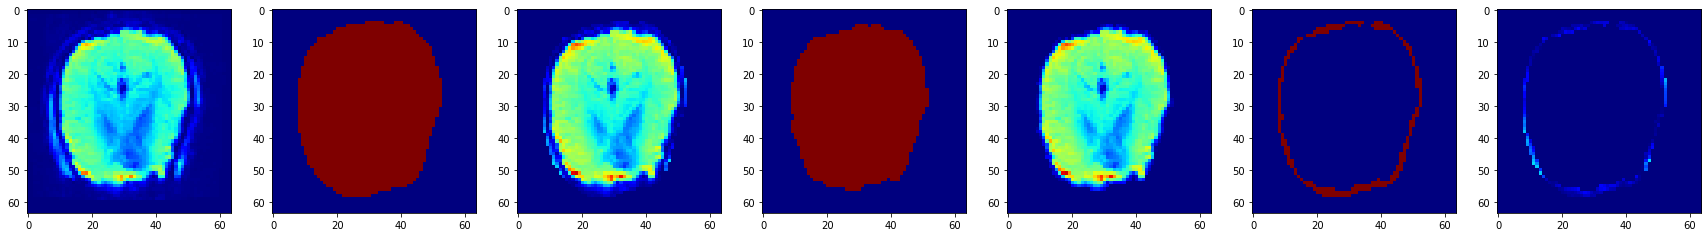

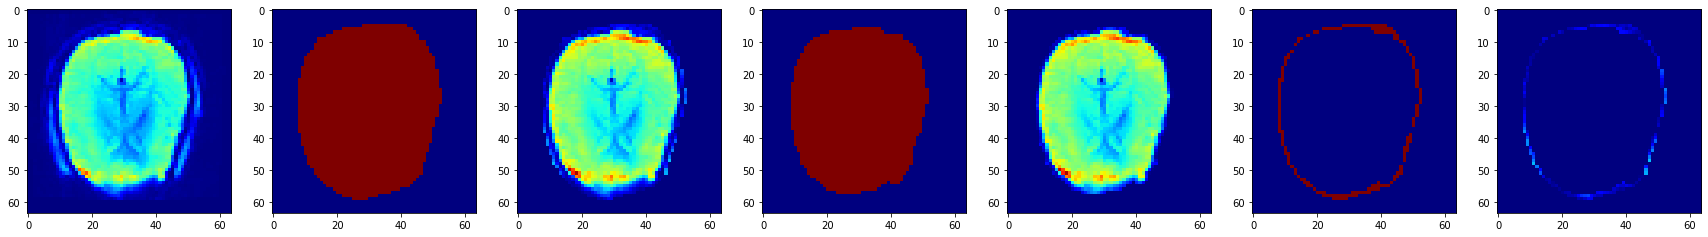

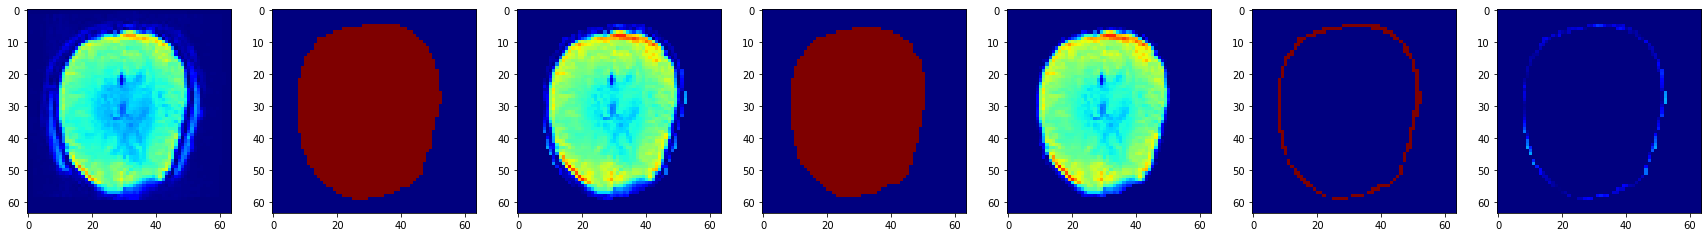

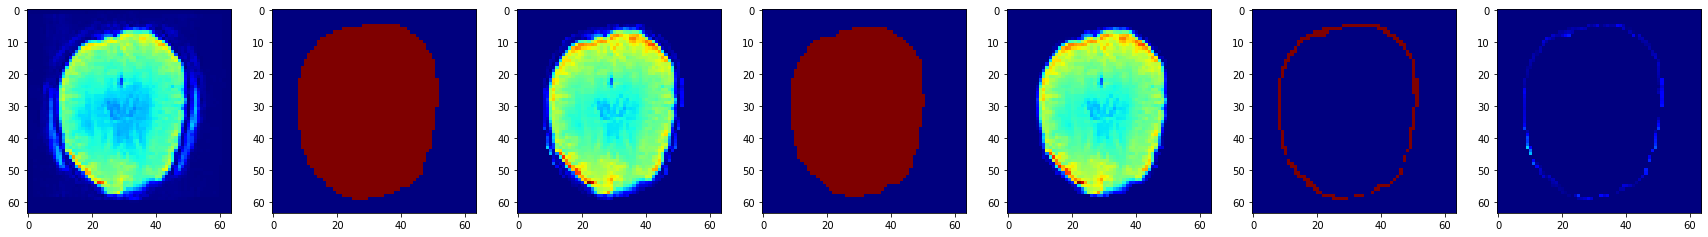

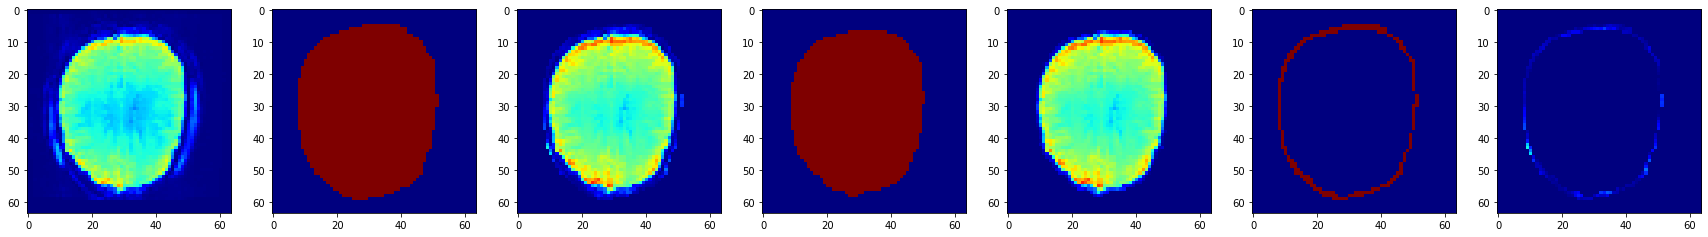

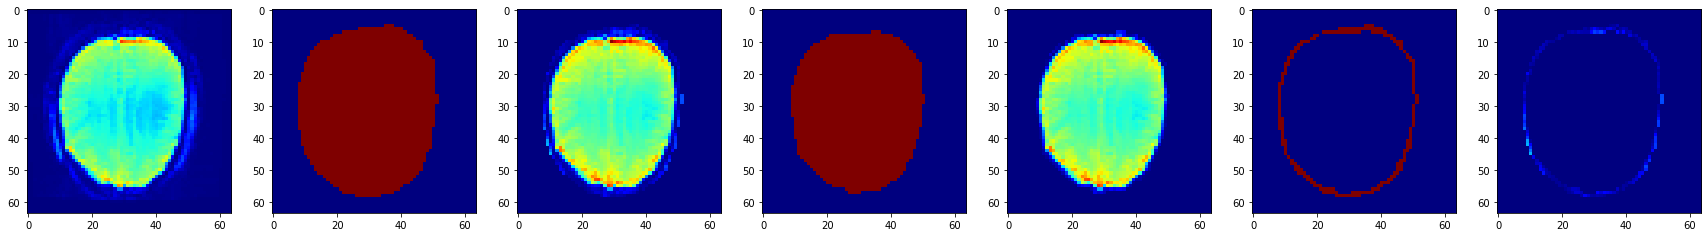

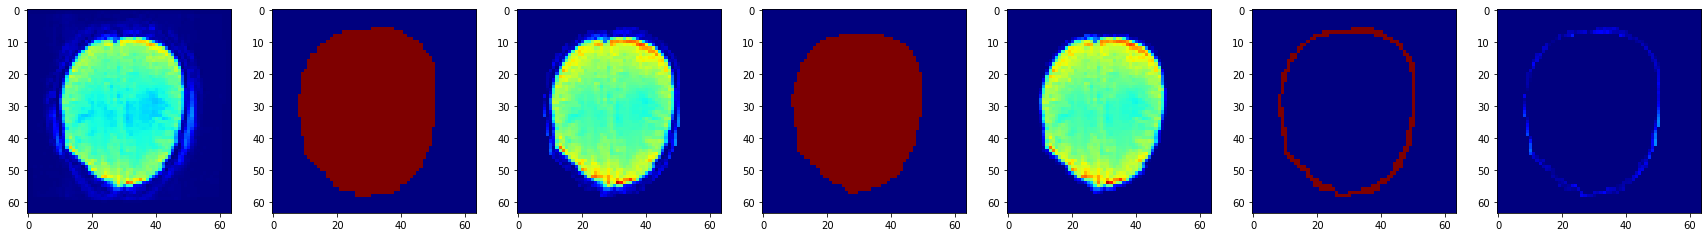

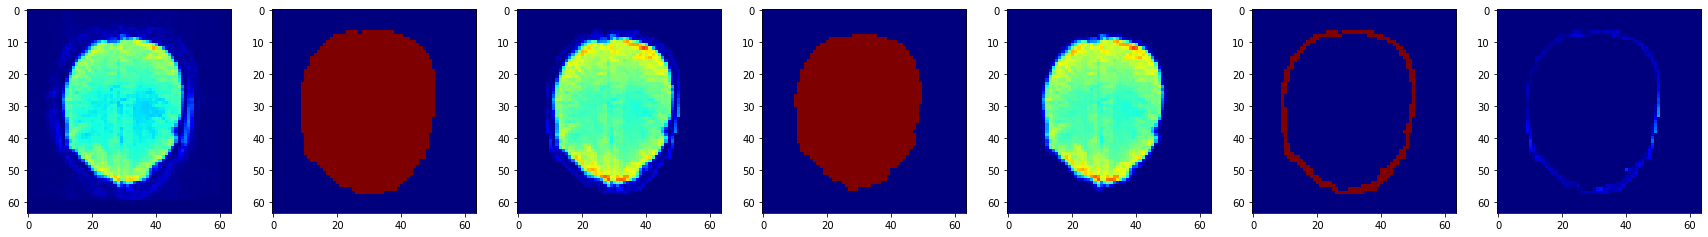

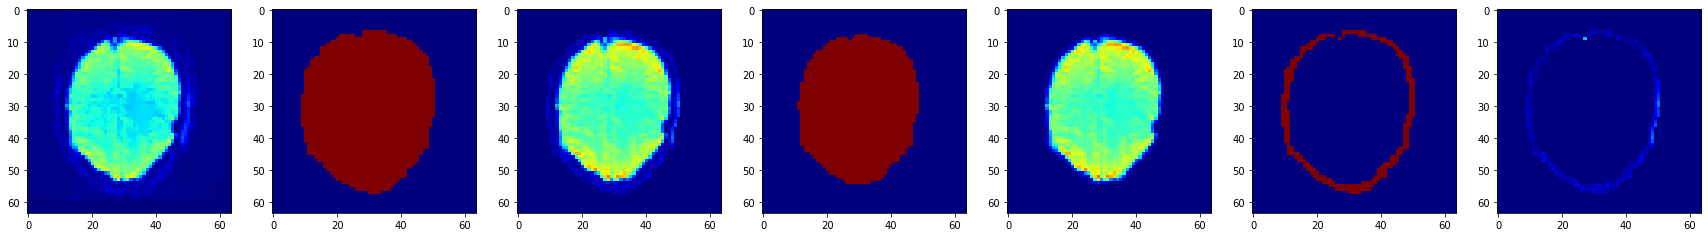

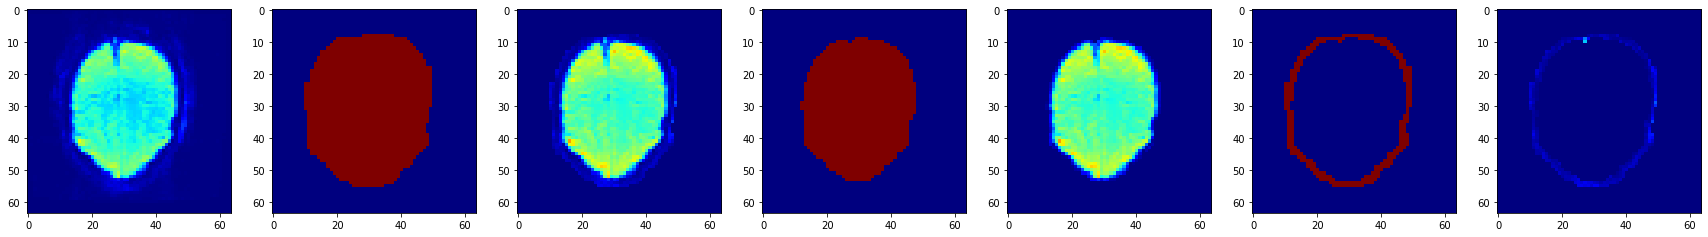

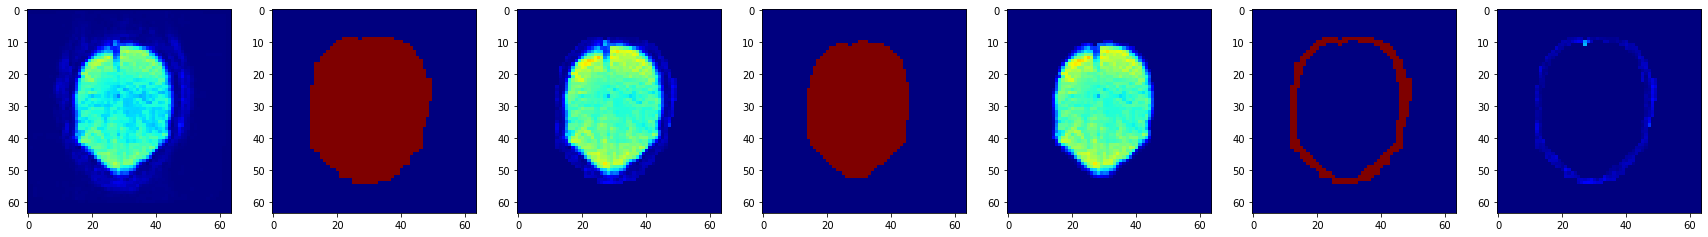

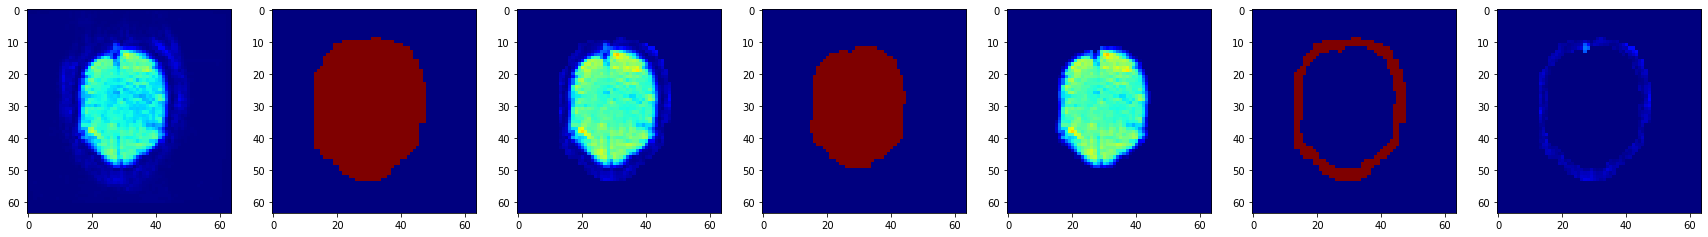

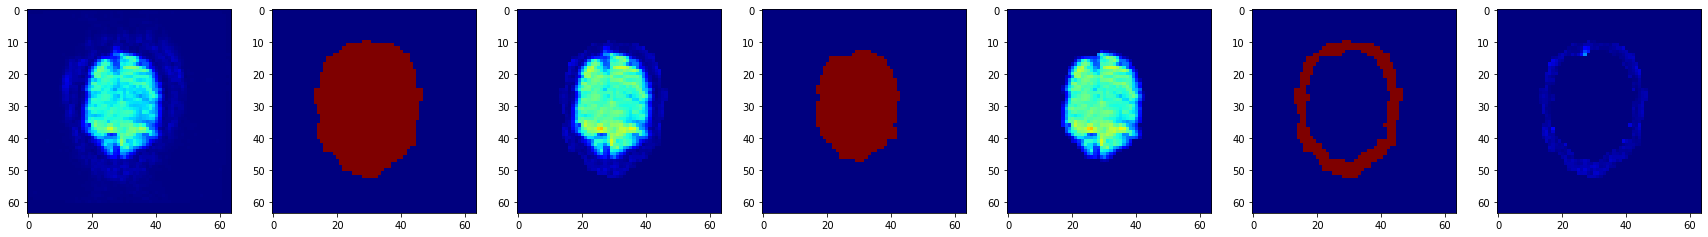

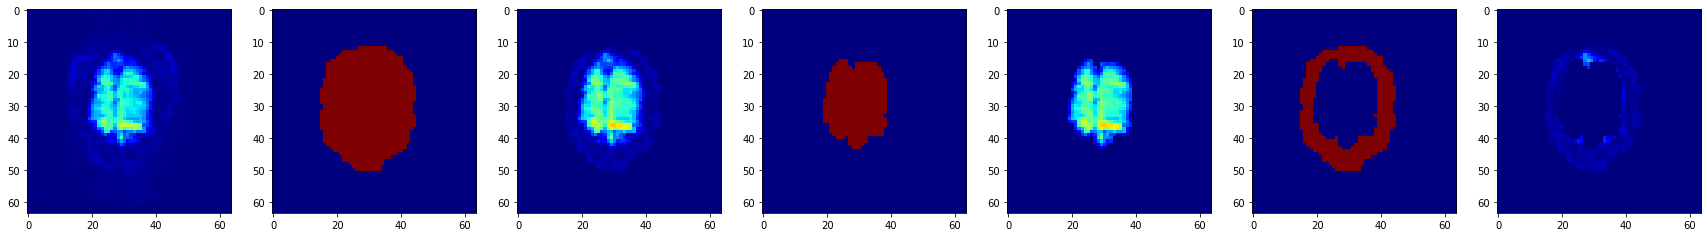

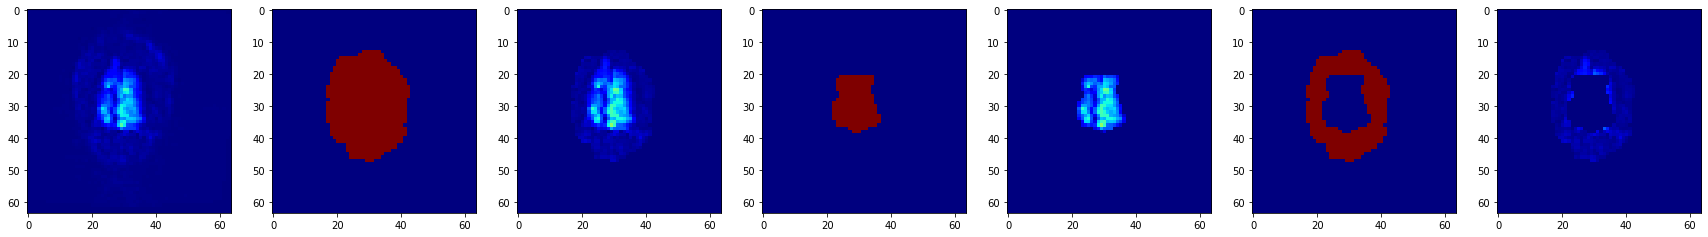

In [135]:
# nii_max = np.max(nii, axis=-1)
# nii_med = np.median(nii, axis=-1)
# nii_avg = np.mean(nii, axis=-1)
# nii_min = np.min(nii, axis=-1)

fsl_brain = nii_max * fsl_mask
mask_init = labs.mask.compute_mask(nii_max, m=0.1, M=0.99, opening=True, exclude_zeros=True)
brain_init = nii_max * mask_init
mask = grow_mask(mask_init)
brain = nii_max * mask
mask_diff = np.abs(fsl_mask - mask)
brain_margin = nii_max * mask_diff

max_max = nii_max.max()
max_min = nii_max.min()
range_max = nii_range.max()
range_min = nii_range.min()
brain_max = brain.max()
brain_min = brain.min()

# nii_range *= 2
# fsl_brain *= 2
# brain *= 2
# brain_margin *= 2
# others = nii_range - brain
# eye1_mask = labs.mask.compute_mask(others, m=0.85, M=0.99, opening=True, exclude_zeros=True)
# eye1 = others * eye1_mask
# rest = others - eye1
# eye2_mask = labs.mask.compute_mask(rest, m=0.85, M=0.99, opening=True, exclude_zeros=True)
# eye_mask = eye2_mask
# eye = others * eye_mask
# rest = others - eye
for i in range(mask.shape[2]):
    fig, axes = plt.subplots(1, 7, figsize=(30,20))
    axes[0].imshow(nii_max[:,:,i].T, vmin=max_min, vmax=max_max, cmap='jet')
    axes[1].imshow(fsl_mask[:,:,i].T, cmap='jet')
    axes[2].imshow(fsl_brain[:,:,i].T, vmin=brain_min, vmax=brain_max, cmap='jet')
    axes[3].imshow(mask[:,:,i].T, cmap='jet')
    axes[4].imshow(brain[:,:,i].T, vmin=brain_min, vmax=brain_max, cmap='jet')
    axes[5].imshow(mask_diff[:,:,i].T, cmap='jet')
    axes[6].imshow(brain_margin[:,:,i].T, vmin=brain_min, vmax=brain_max, cmap='jet')
    plt.show()
plt.close()

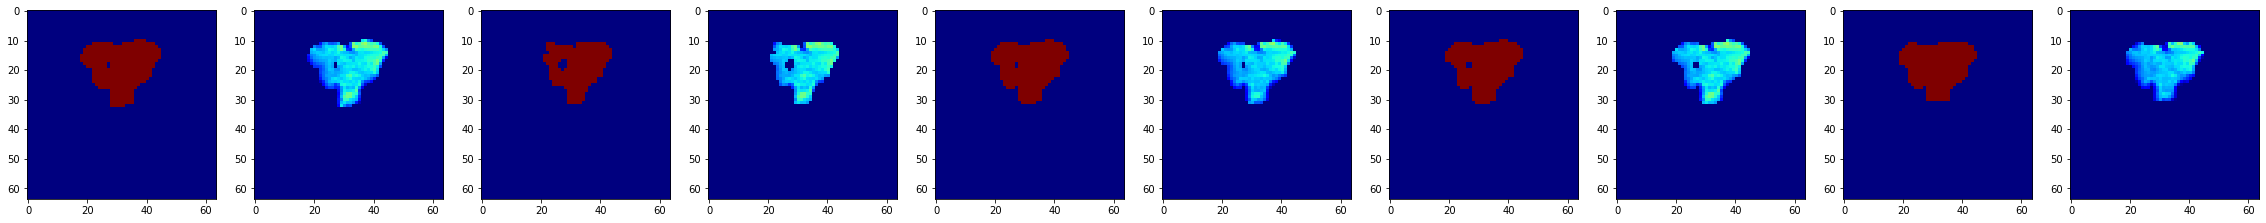

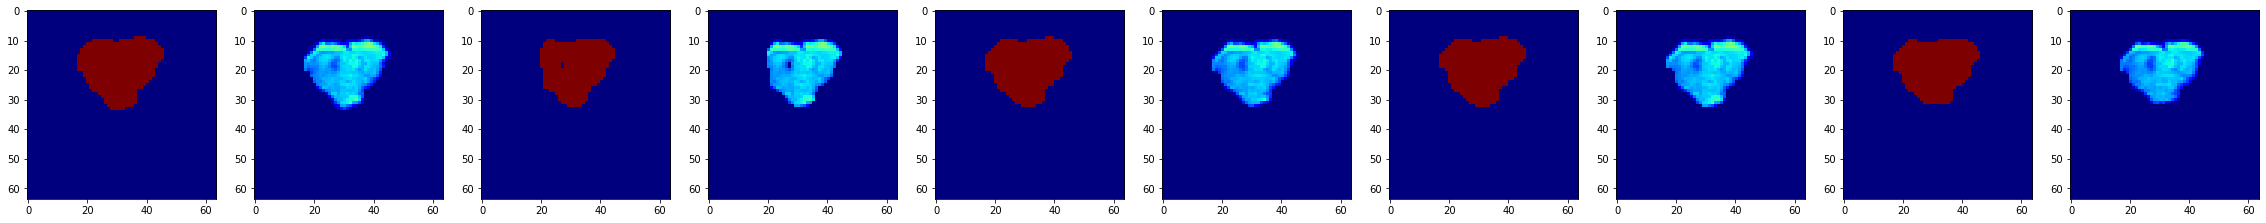

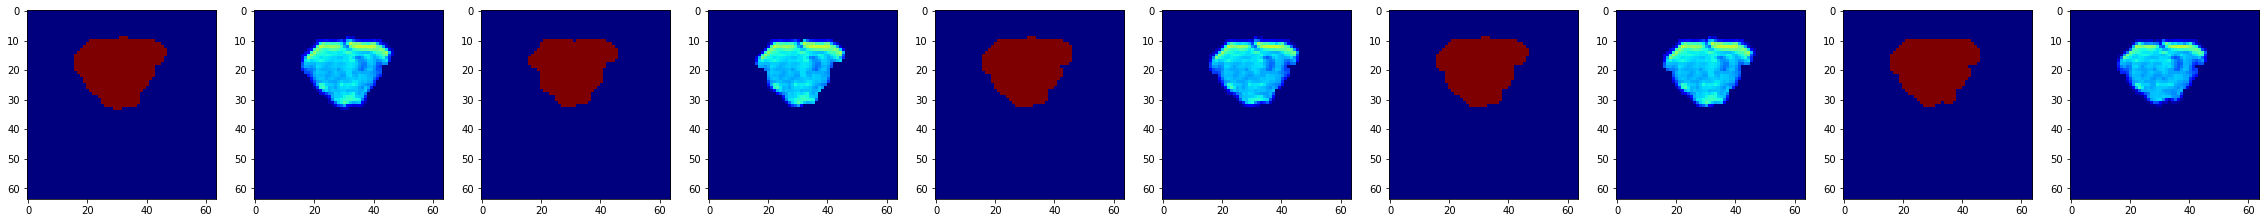

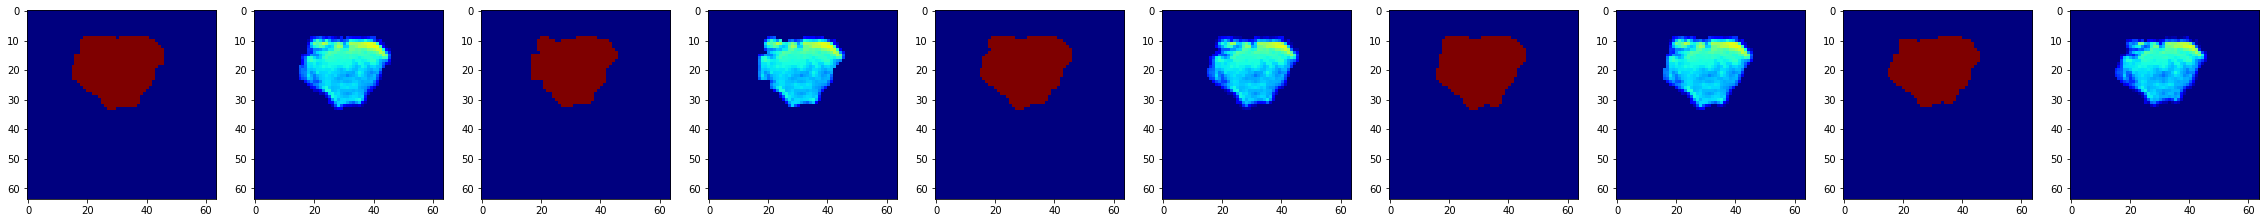

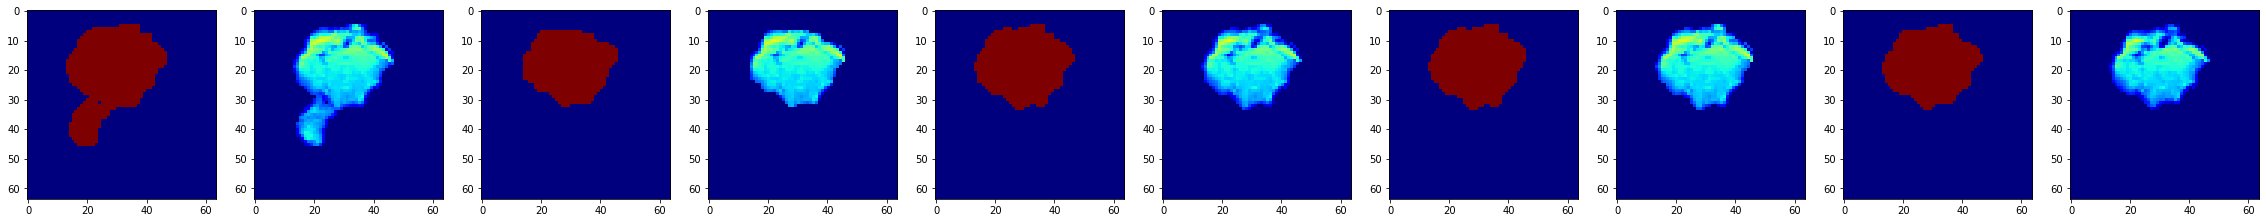

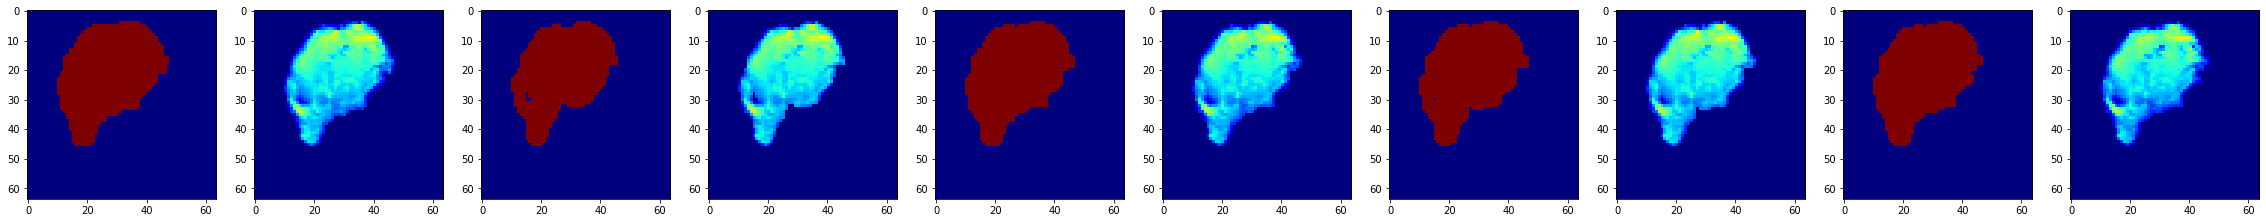

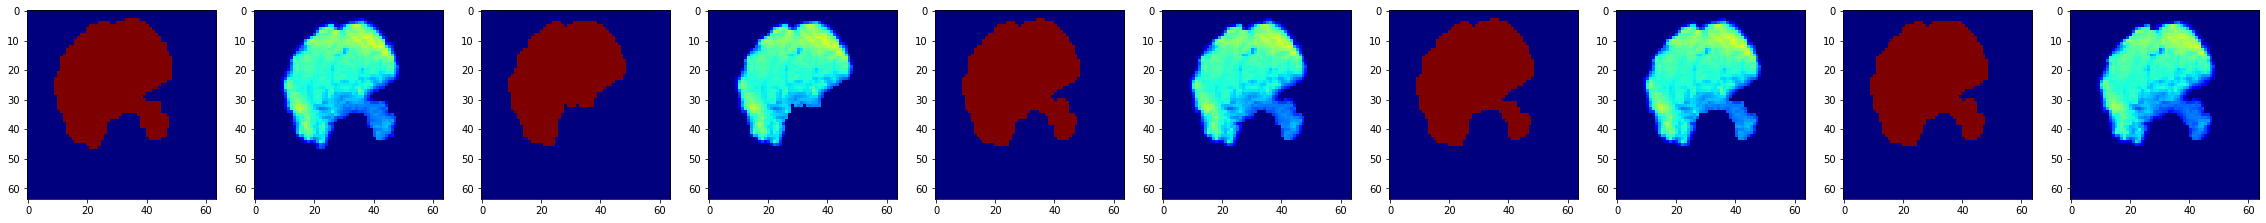

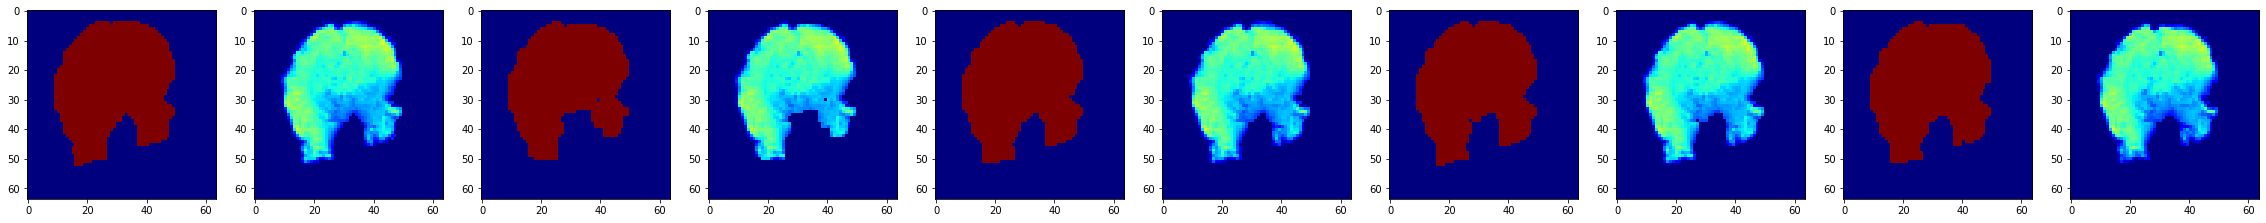

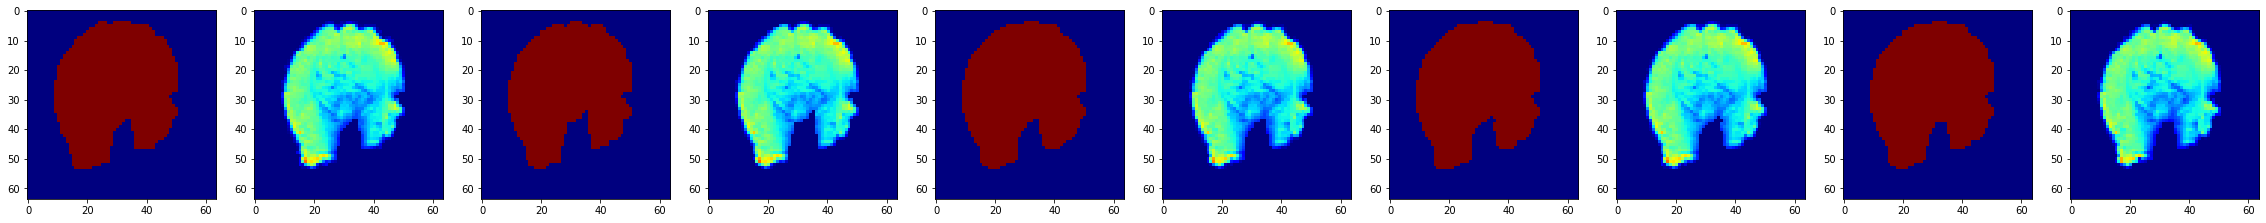

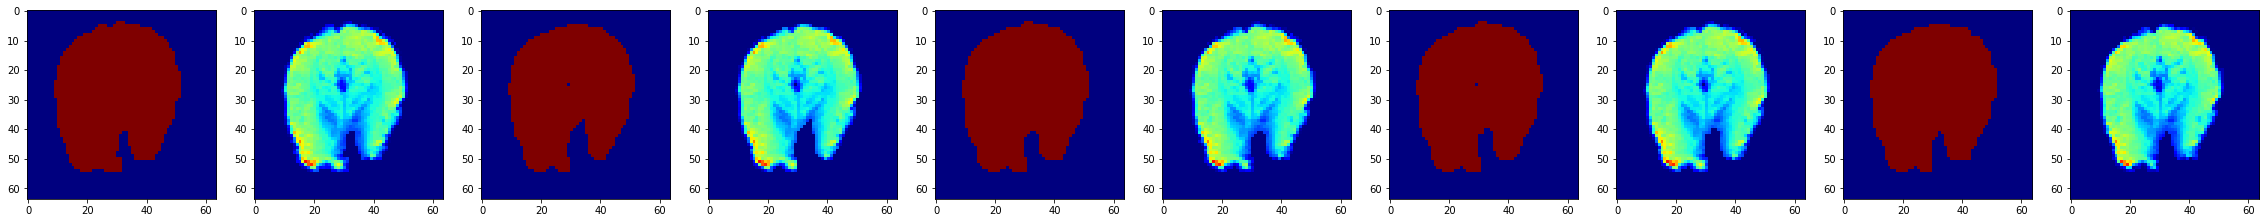

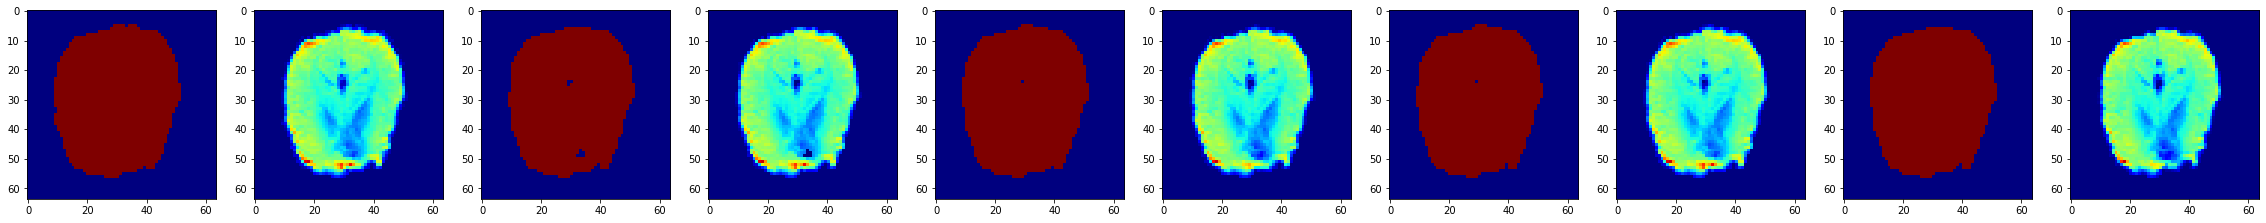

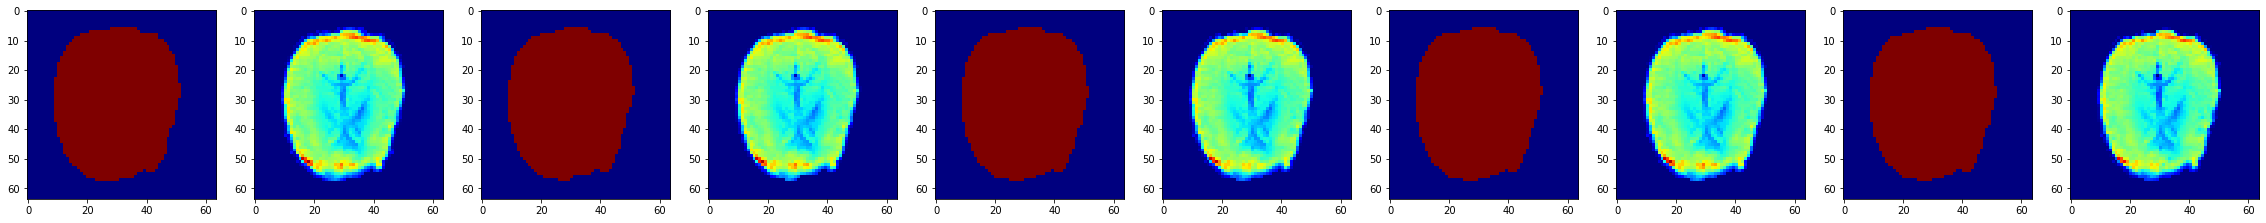

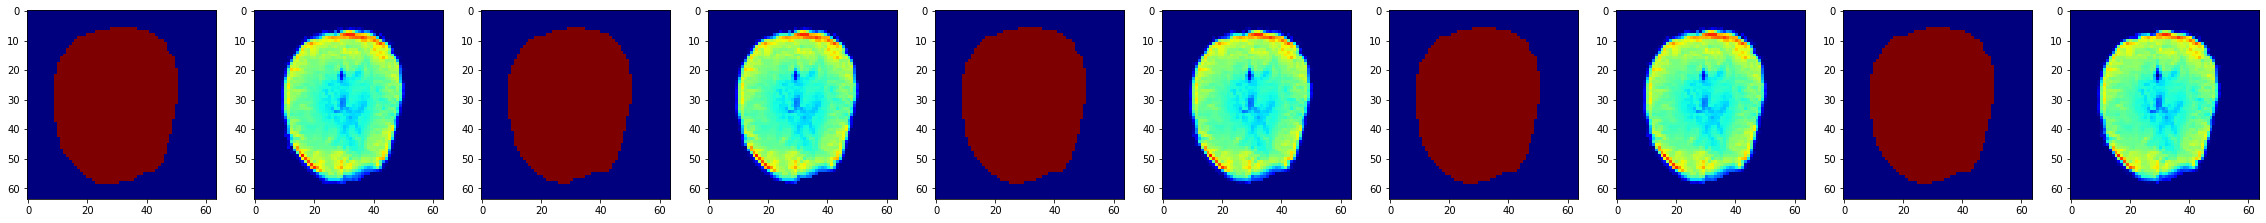

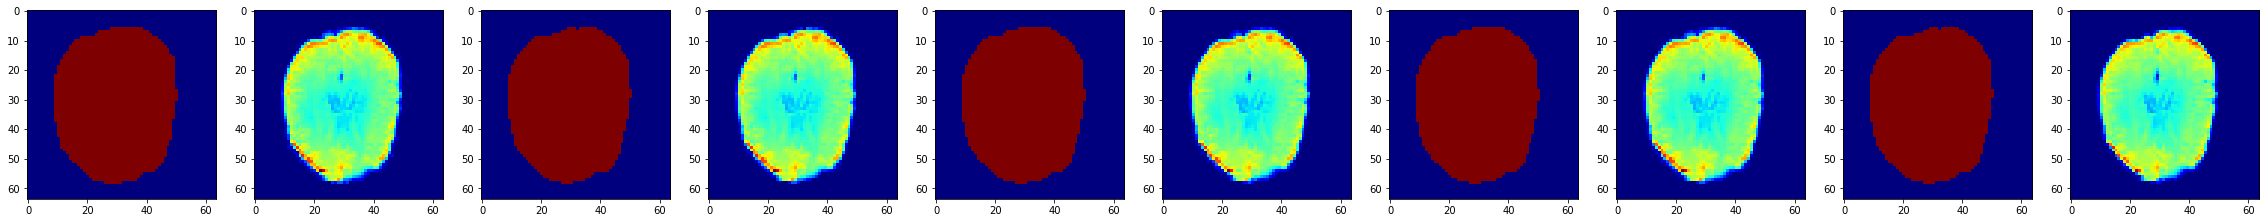

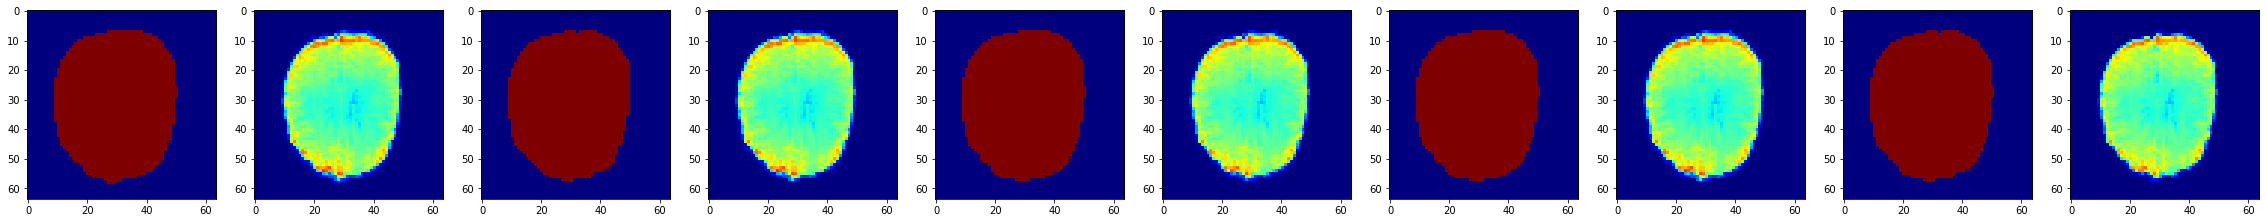

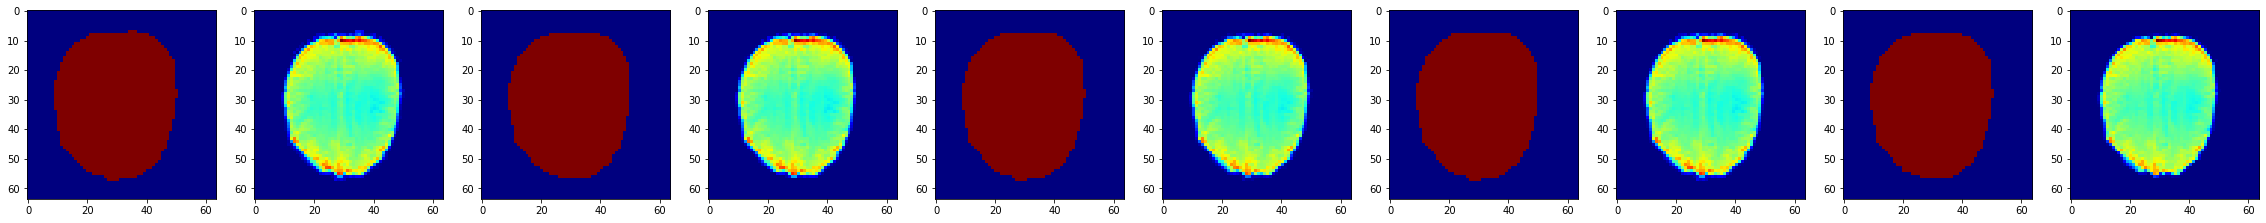

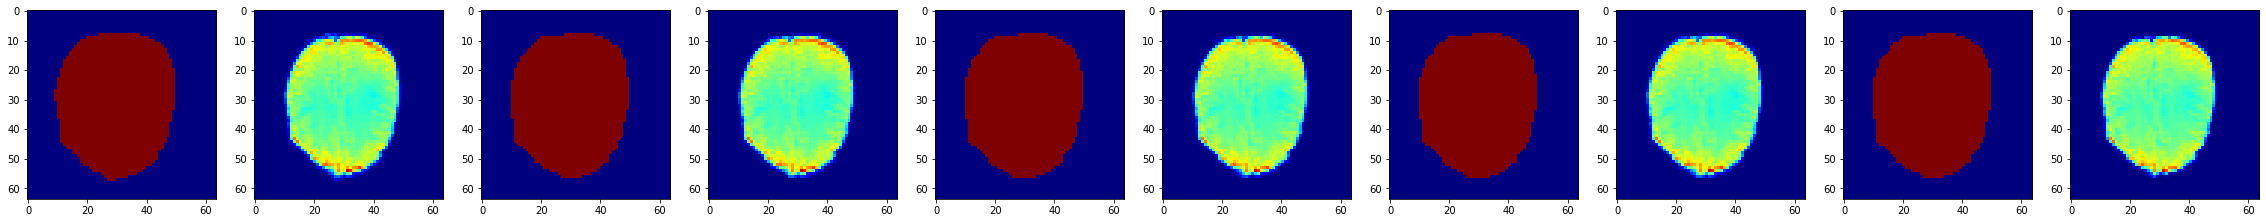

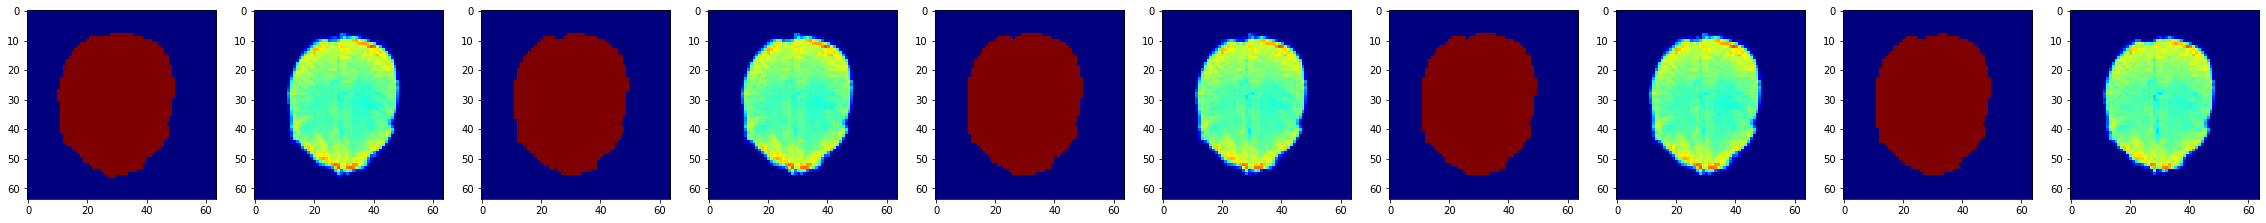

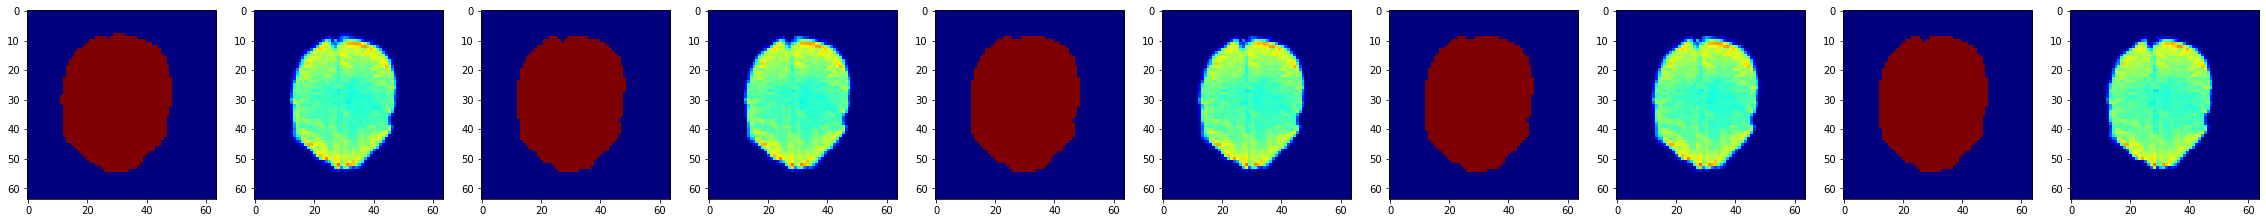

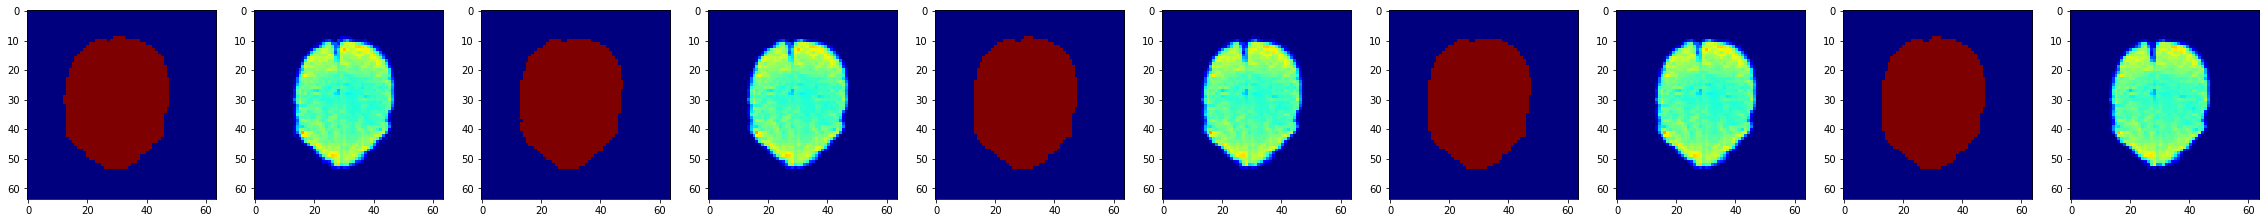

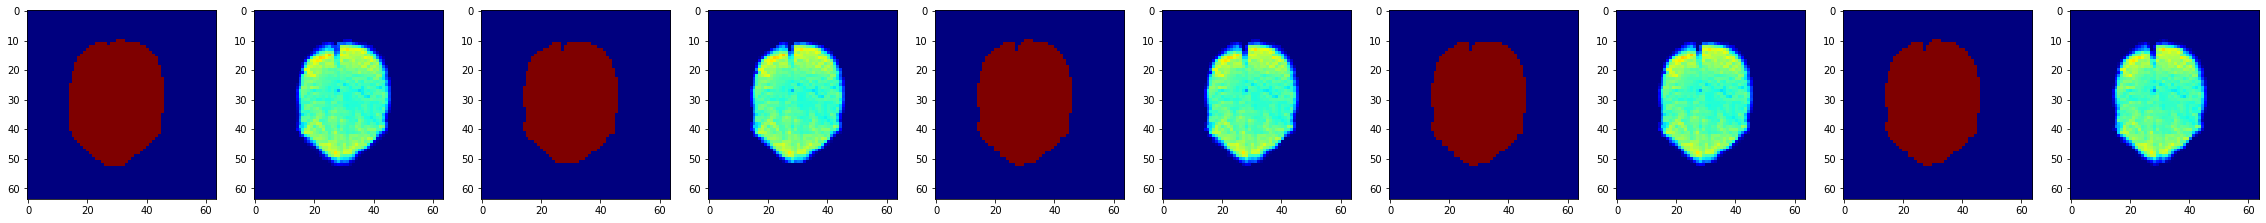

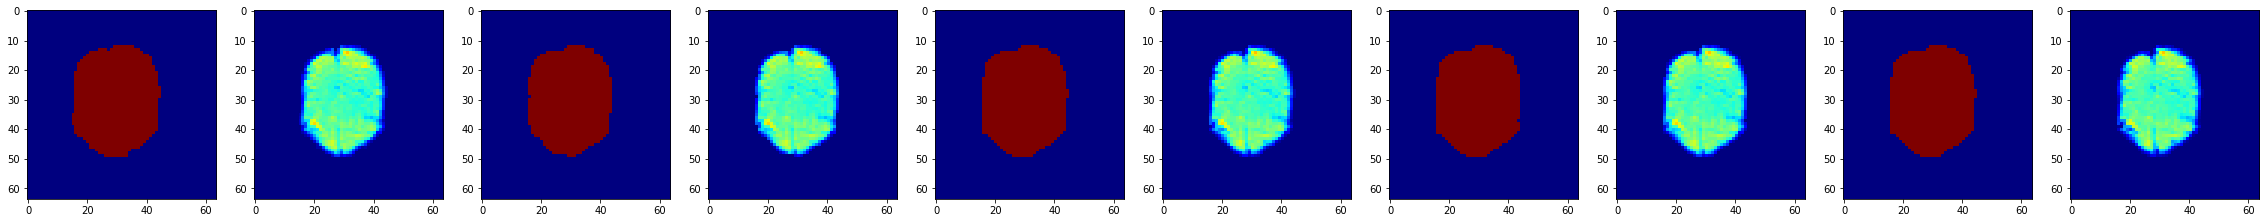

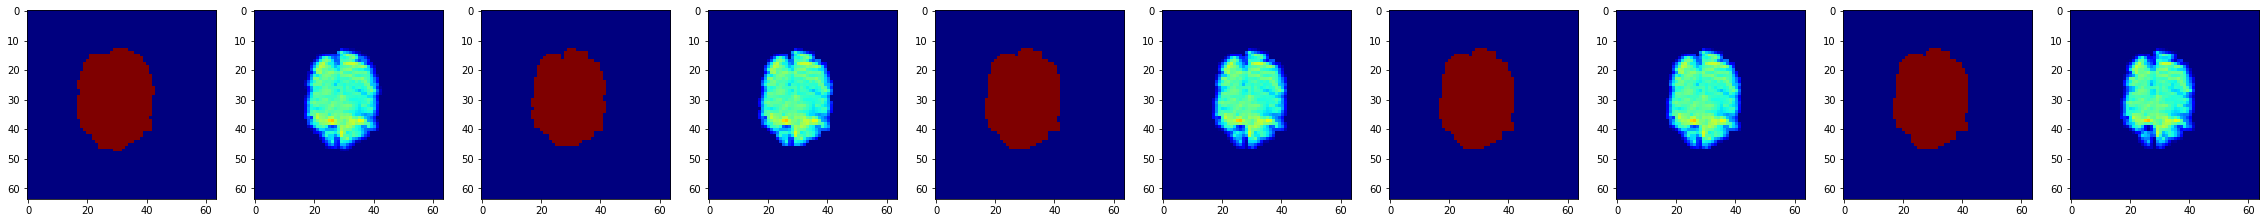

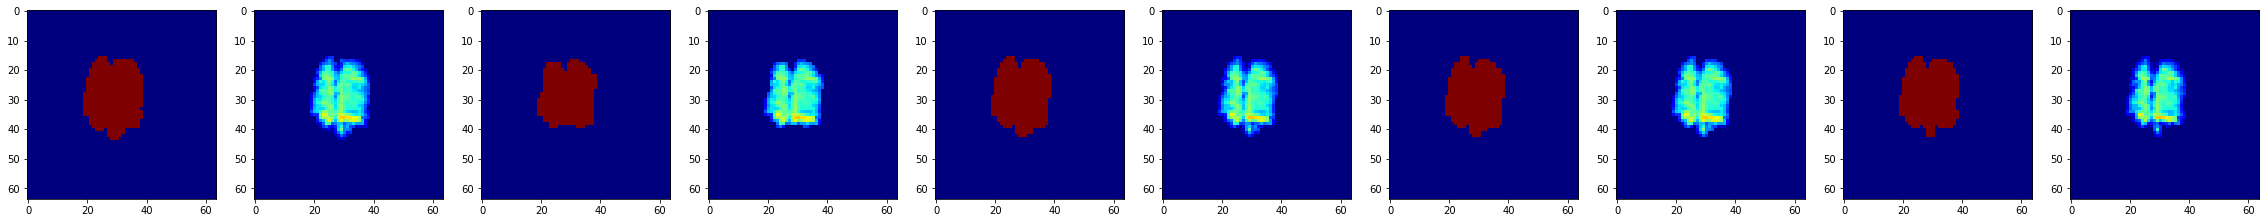

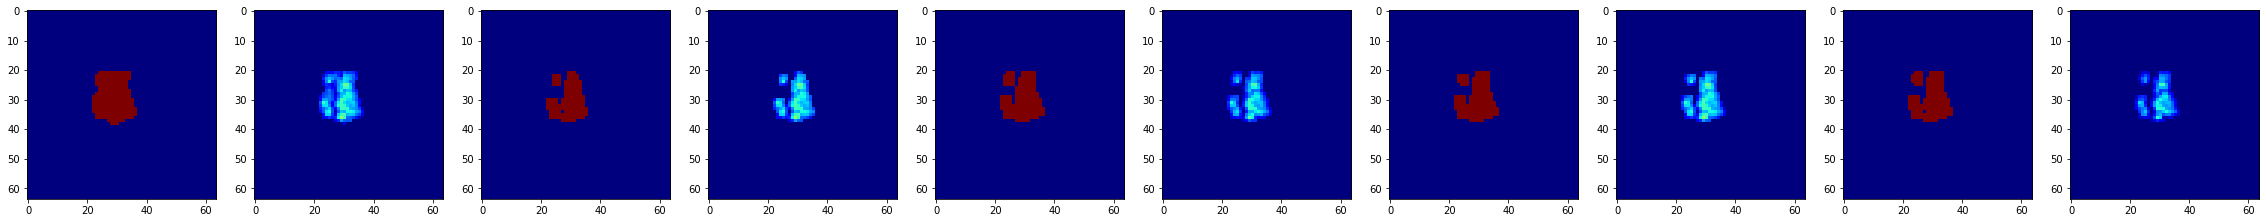

In [136]:
nii_p25 = np.percentile(nii, 25, axis=-1)
nii_p75 = np.percentile(nii, 75, axis=-1)

max_mask = labs.mask.compute_mask(nii_max, m=0.1, M=0.90, opening=True, exclude_zeros=True)
max_mask = grow_mask(max_mask)
brain_max = nii_max * max_mask

p25_mask = labs.mask.compute_mask(nii_p25, m=0.1, M=0.90, opening=True, exclude_zeros=True)
p25_mask = grow_mask(p25_mask)
brain_p25 = nii_max * p25_mask

med_mask = labs.mask.compute_mask(nii_med, m=0.1, M=0.90, opening=True, exclude_zeros=True)
med_mask = grow_mask(med_mask)
brain_med = nii_med * med_mask

p75_mask = labs.mask.compute_mask(nii_p75, m=0.1, M=0.90, opening=True, exclude_zeros=True)
p75_mask = grow_mask(p75_mask)
brain_p75 = nii_max * p75_mask

min_mask = labs.mask.compute_mask(nii_min, m=0.1, M=0.90, opening=True, exclude_zeros=True)
min_mask = grow_mask(min_mask)
brain_min = nii_min * min_mask

max_max = brain_max.max()
max_min = brain_max.min()
p75_max = brain_p75.max()
p75_min = brain_p75.min()
med_max = brain_med.max()
med_min = brain_med.min()
p25_max = brain_p25.max()
p25_min = brain_p25.min()
min_max = brain_min.max()
min_min = brain_min.min()

for i in range(mask.shape[2]):
    fig, axes = plt.subplots(1, 10, figsize=(40,30))
    axes[0].imshow(max_mask[:,:,i].T, cmap='jet')
    axes[1].imshow(brain_max[:,:,i].T, vmin=max_min, vmax=max_max, cmap='jet')
    axes[2].imshow(p25_mask[:,:,i].T, cmap='jet')
    axes[3].imshow(brain_p25[:,:,i].T, vmin=p25_min, vmax=p25_max, cmap='jet')
    axes[4].imshow(med_mask[:,:,i].T, cmap='jet')
    axes[5].imshow(brain_med[:,:,i].T, vmin=med_min, vmax=med_max, cmap='jet')
    axes[6].imshow(p75_mask[:,:,i].T, cmap='jet')
    axes[7].imshow(brain_p75[:,:,i].T, vmin=p75_min, vmax=p75_max, cmap='jet')
    axes[8].imshow(min_mask[:,:,i].T, cmap='jet')
    axes[9].imshow(brain_min[:,:,i].T, vmin=min_min, vmax=min_max, cmap='jet')
    plt.show()
plt.close()

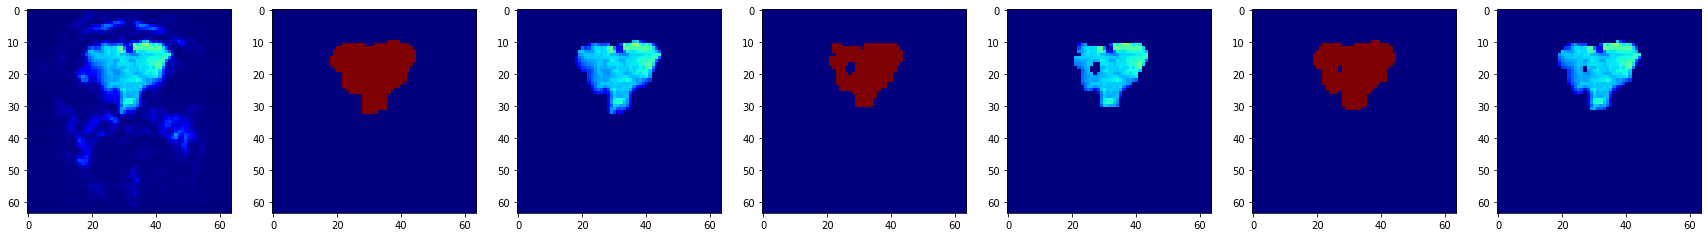

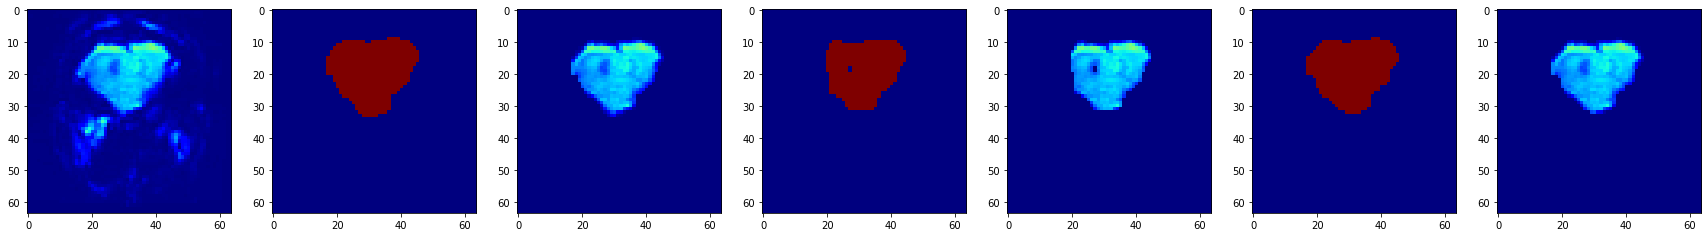

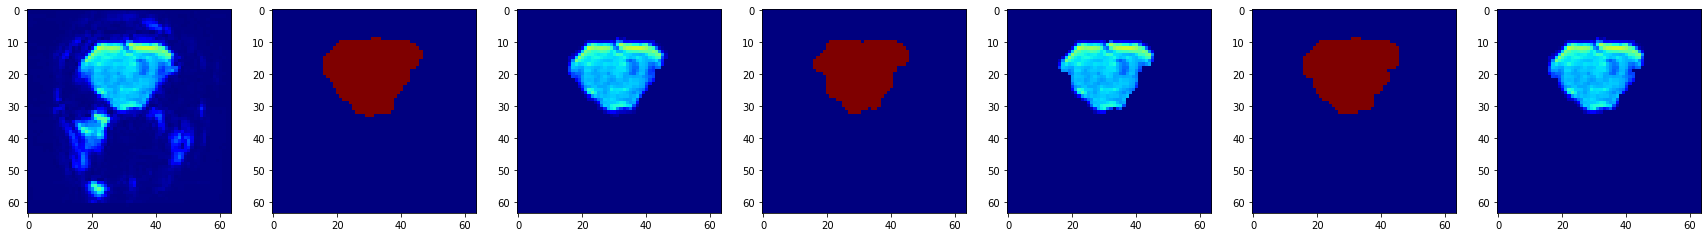

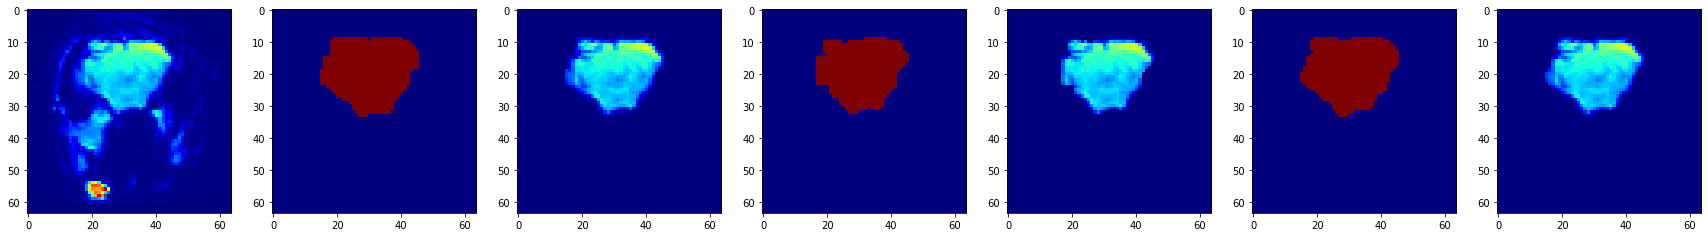

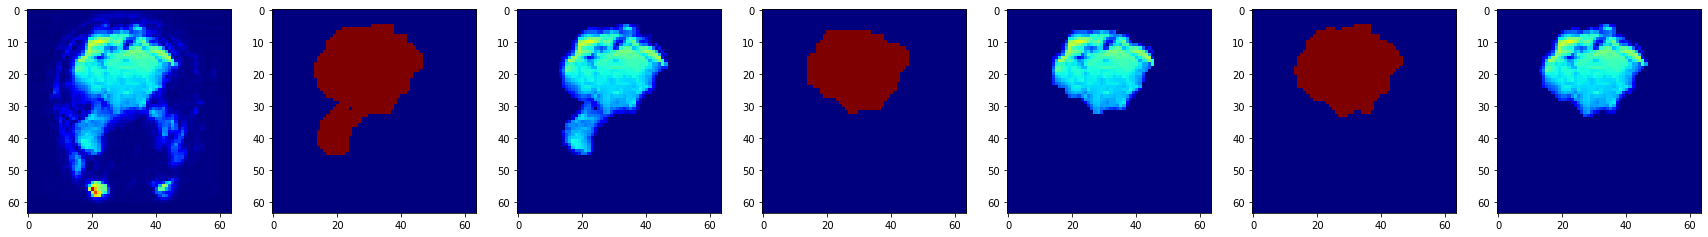

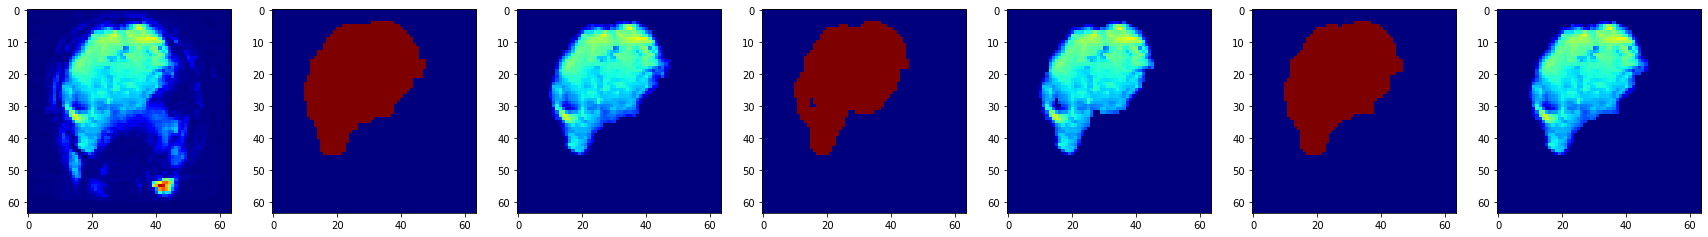

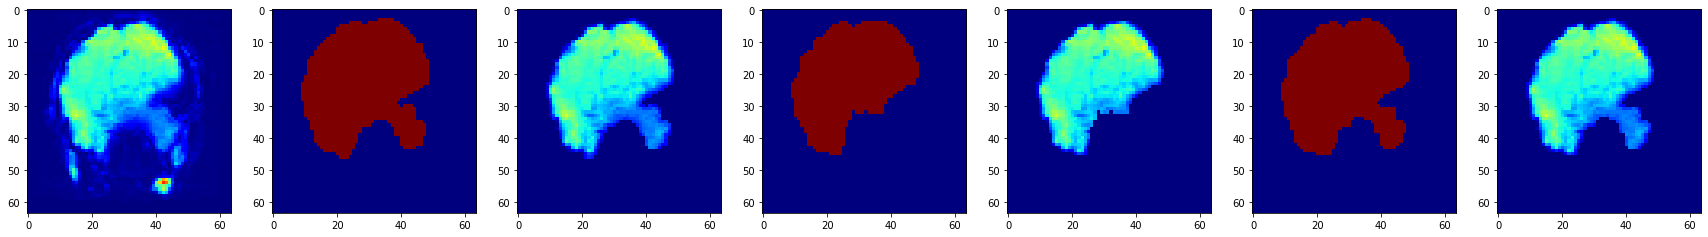

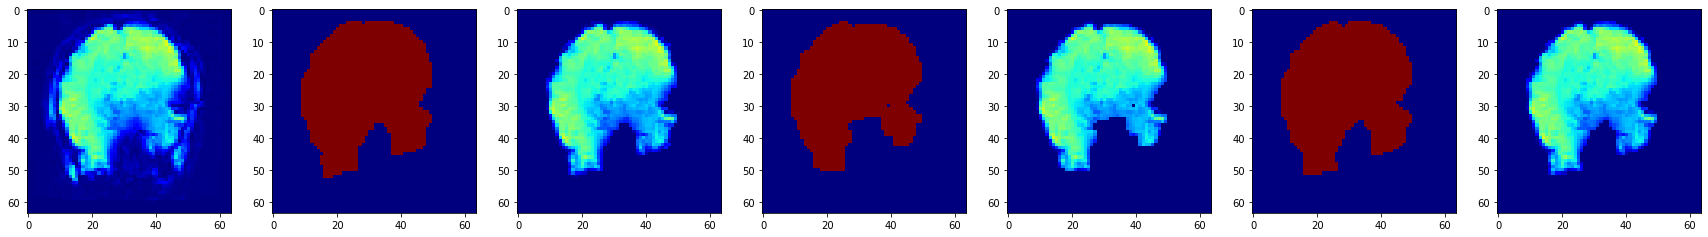

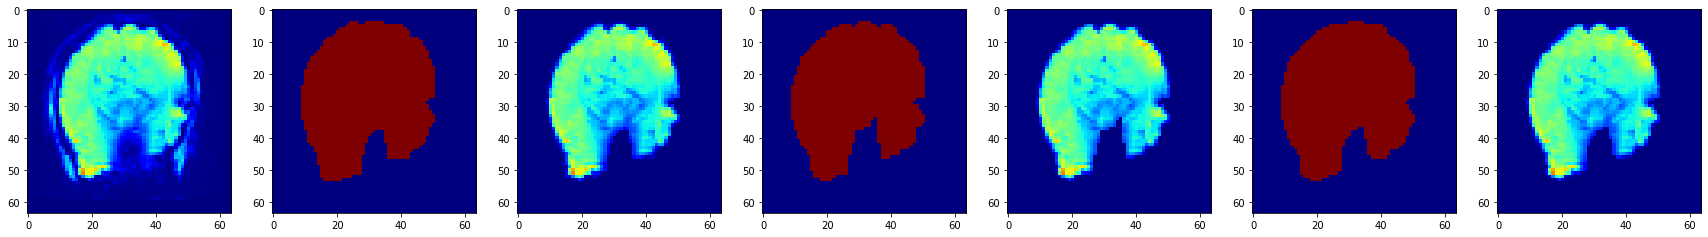

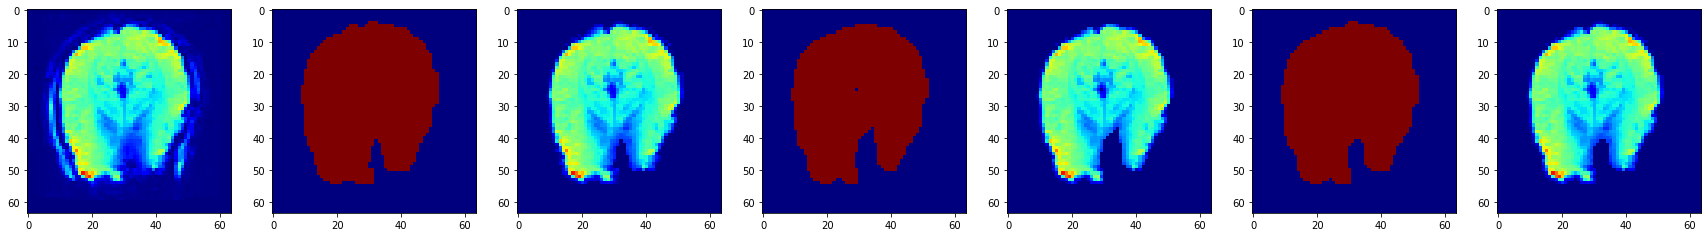

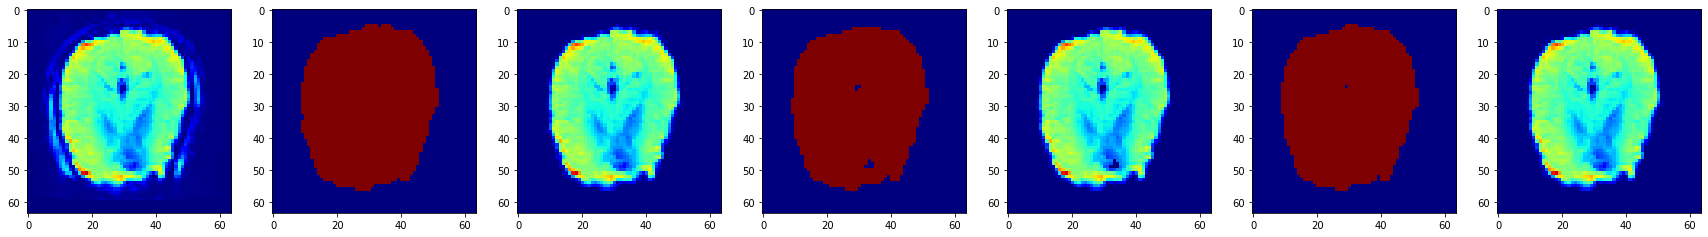

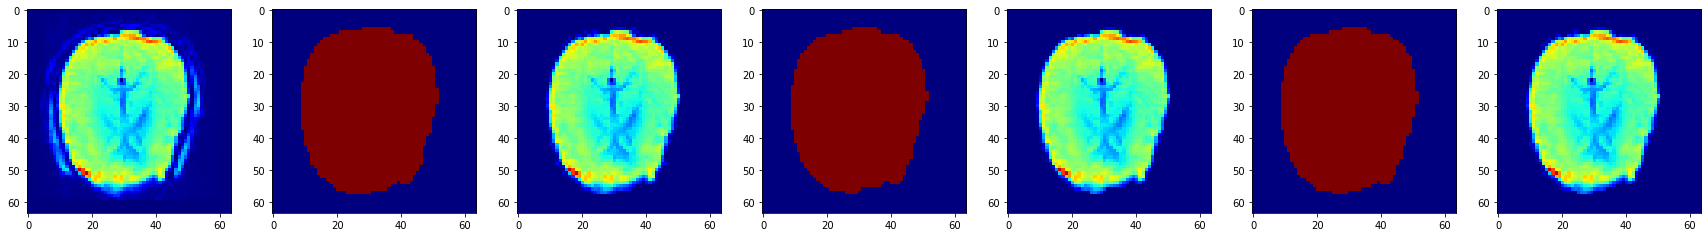

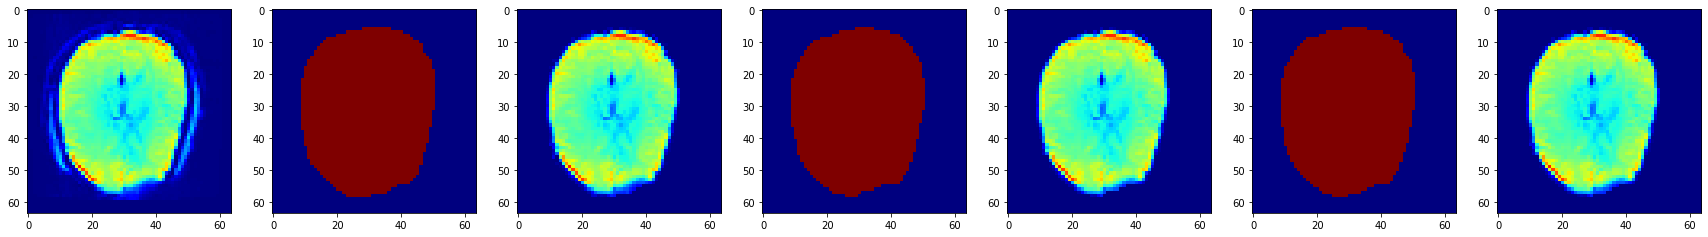

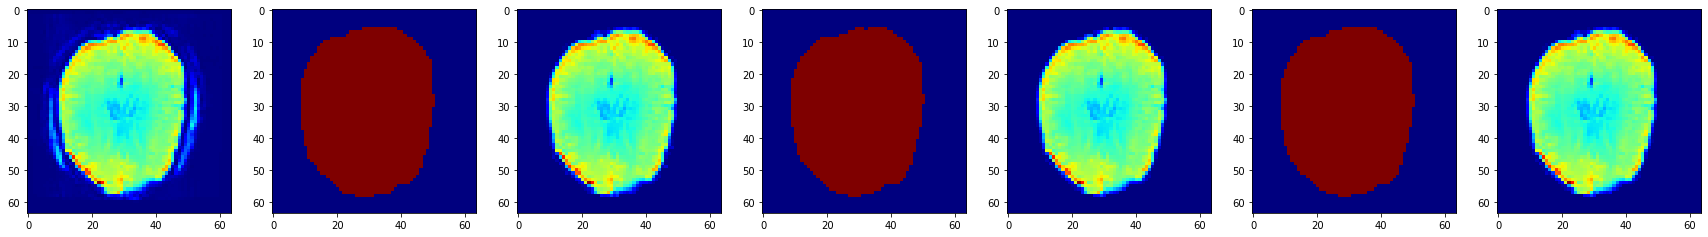

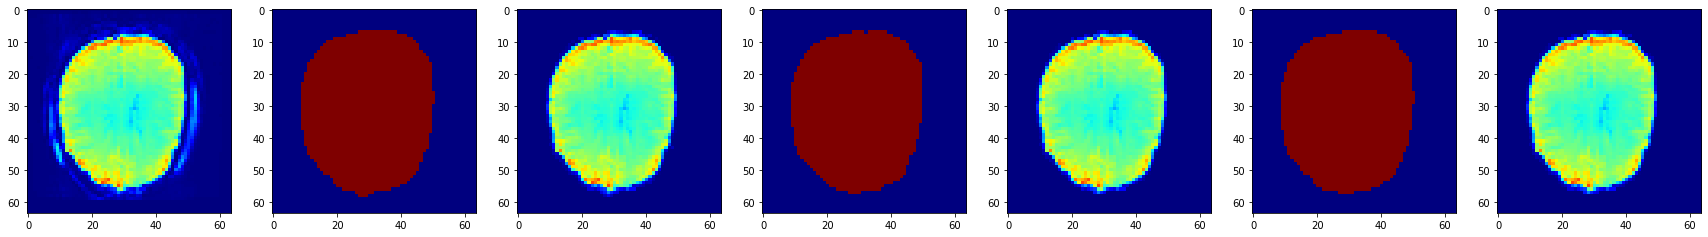

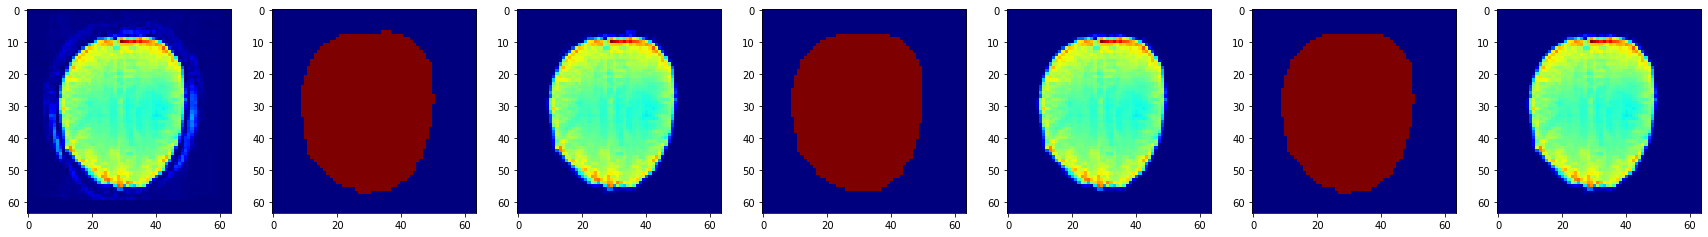

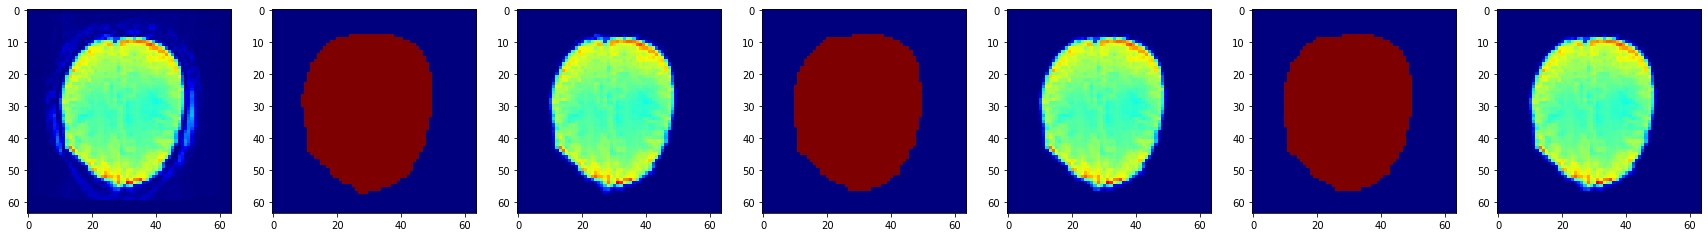

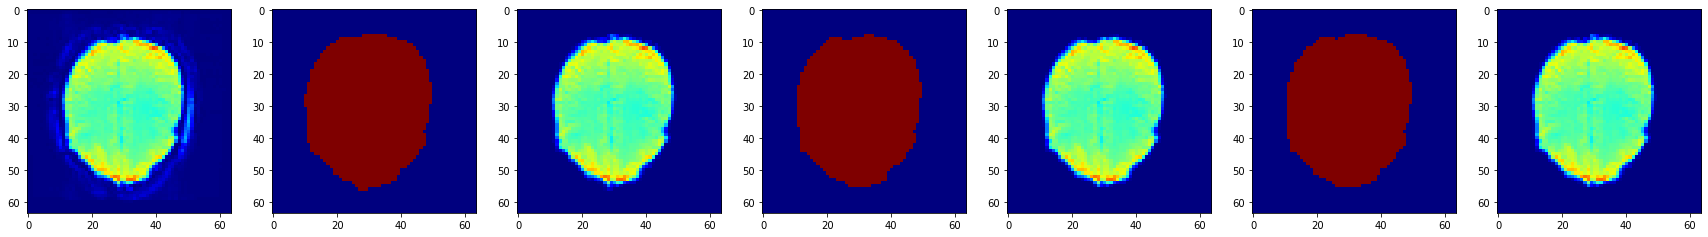

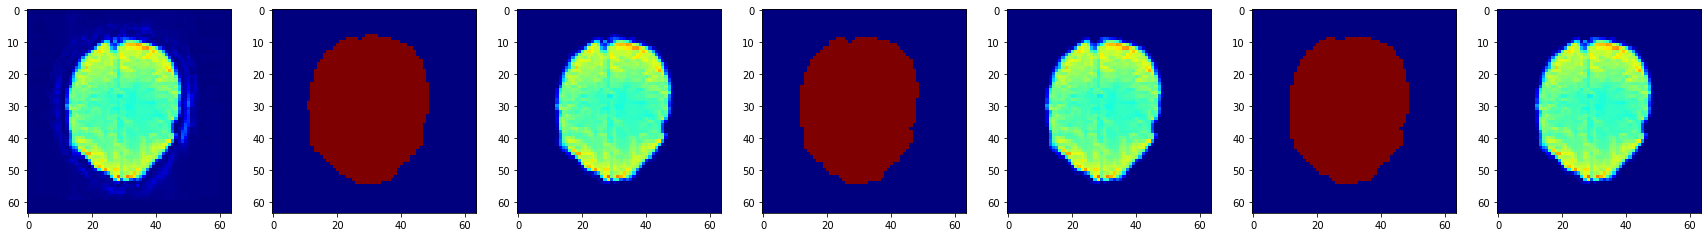

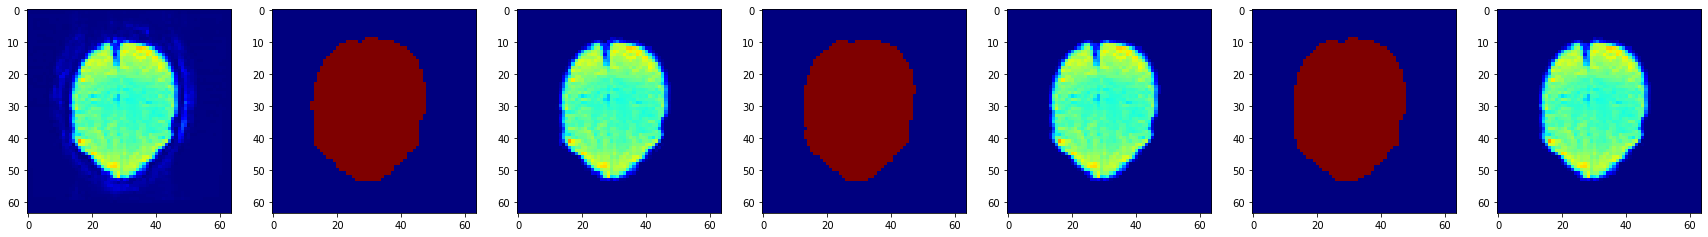

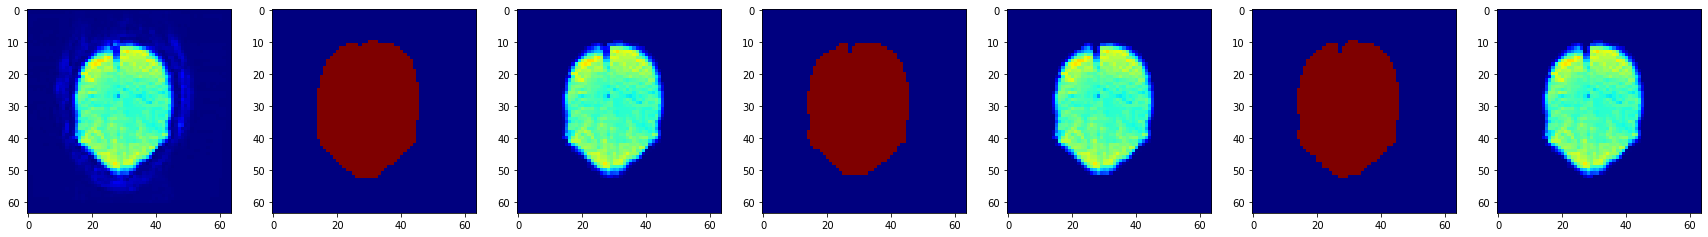

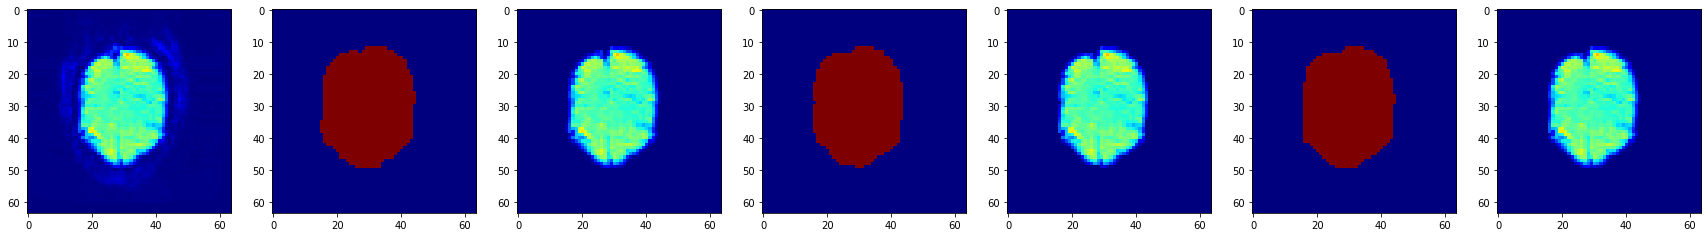

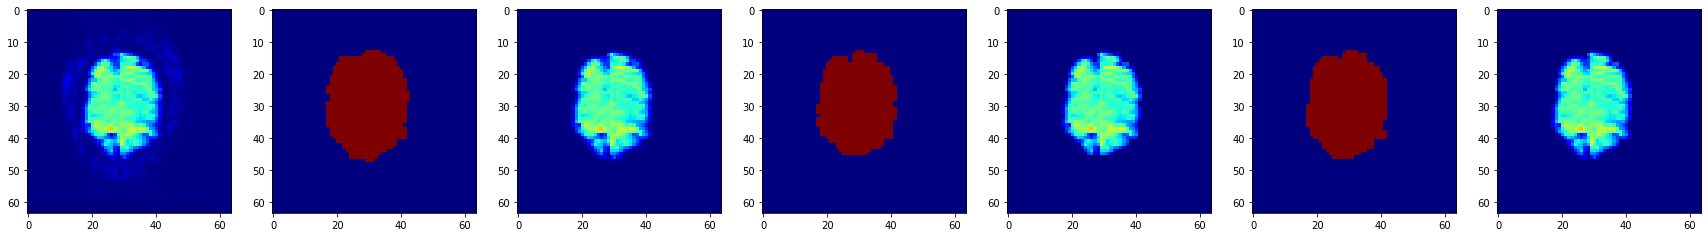

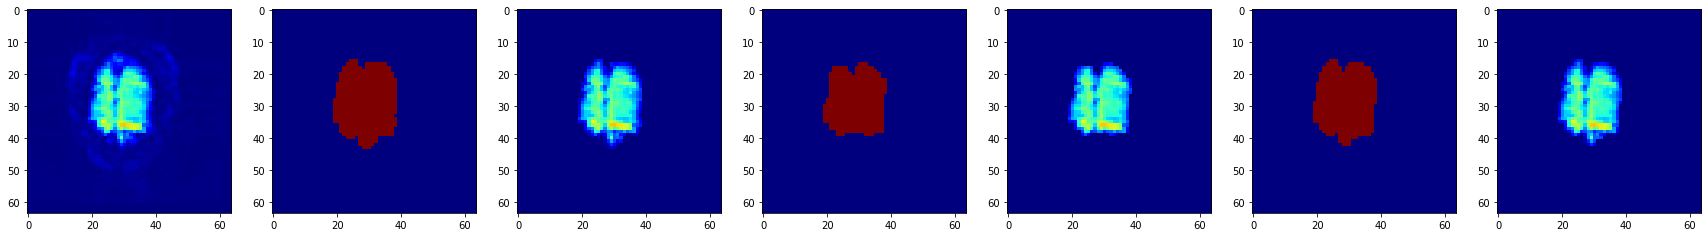

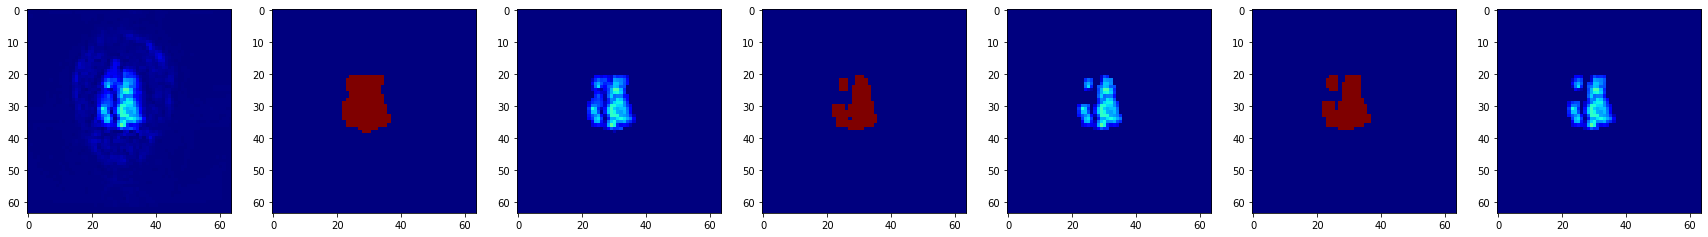

In [154]:
or_mask = np.zeros_like(brain_max)
and_mask = np.zeros_like(brain_max)
v_mask = np.zeros_like(brain_max)
for i in range(final_mask.shape[-1]):
    or_mask[:,:,i] = max_mask[:,:,i] | p25_mask[:,:,i] | med_mask[:,:,i] | p75_mask[:,:,i] | min_mask[:,:,i]
    and_mask[:,:,i] = max_mask[:,:,i] & p25_mask[:,:,i] & med_mask[:,:,i] & p75_mask[:,:,i] & min_mask[:,:,i]
    v_mask[:,:,i] = max_mask[:,:,i].astype(int) + p25_mask[:,:,i].astype(int) + med_mask[:,:,i].astype(int) + p75_mask[:,:,i].astype(int) + min_mask[:,:,i].astype(int)
v_mask[v_mask < 2.5] = 0
v_mask[v_mask > 2.5] = 1

or_brain = nii_med * or_mask
and_brain = nii_med * and_mask
v_brain = nii_med * v_mask

or_max = or_brain.max()
or_min = or_brain.min()
and_max = and_brain.max()
and_min = and_brain.min()
v_max = v_brain.max()
v_min = v_brain.min()

for i in range(mask.shape[2]):
    fig, axes = plt.subplots(1, 7, figsize=(30,90))
    axes[0].imshow(nii_med[:,:,i].T, vmin=med_min, vmax=med_max, cmap='jet')
    axes[1].imshow(or_mask[:,:,i].T, cmap='jet')
    axes[2].imshow(or_brain[:,:,i].T, vmin=med_min, vmax=med_max, cmap='jet')
    axes[3].imshow(and_mask[:,:,i].T,cmap='jet')
    axes[4].imshow(and_brain[:,:,i].T, vmin=med_min, vmax=med_max, cmap='jet')
    axes[5].imshow(v_mask[:,:,i].T,cmap='jet')
    axes[6].imshow(v_brain[:,:,i].T, vmin=med_min, vmax=med_max, cmap='jet')
    plt.show()
plt.close()

In [155]:
#eyes : eye
#brains : brain
brain_t_mask = [v_mask]*nii.shape[-1]
brain_t_mask = np.moveaxis(brain_t_mask, 0, -1)
brain_t = nii * brain_t_mask

# eye_t_mask = [eye]*nii.shape[-1]
# eye_t_mask = np.moveaxis(eye_t_mask, 0, -1)
# eye_t = nii * eye_t_mask

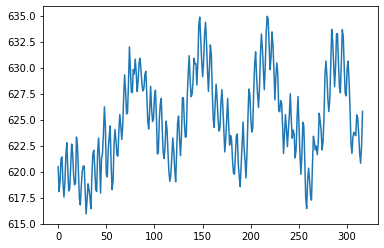

In [156]:
brain_t_series = np.zeros(nii.shape[-1])
for i in range(nii.shape[-1]):
    brain_t_series[i] = brain_t[:,:,:,i].mean()
plt.plot(brain_t_series)
plt.show()
plt.close()

# eye_t_series = np.zeros(nii.shape[-1])
# for i in range(nii.shape[-1]):
#     eye_t_series[i] = eye_t[:,:,:,i].mean()
# plt.plot(eye_t_series)
# plt.show()
# plt.close()

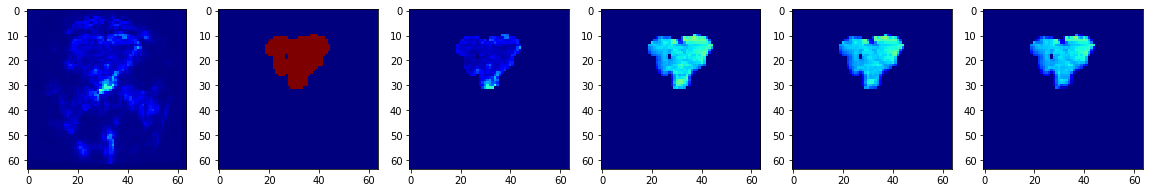

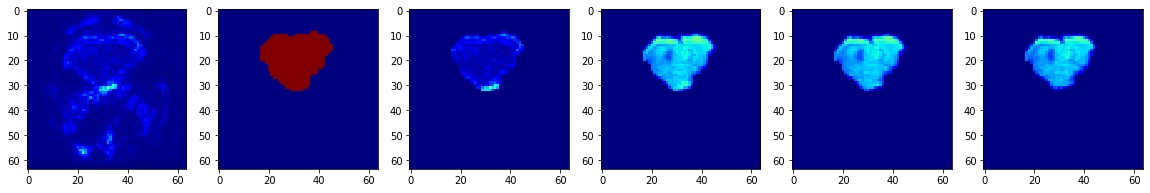

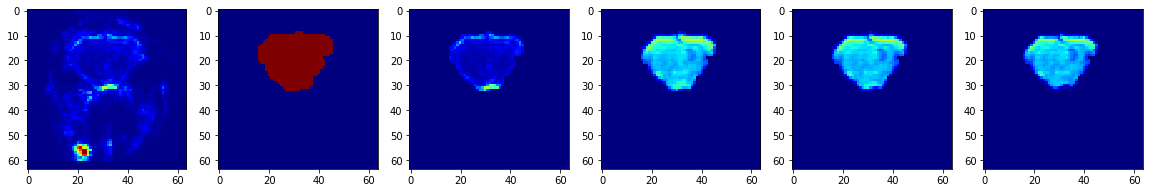

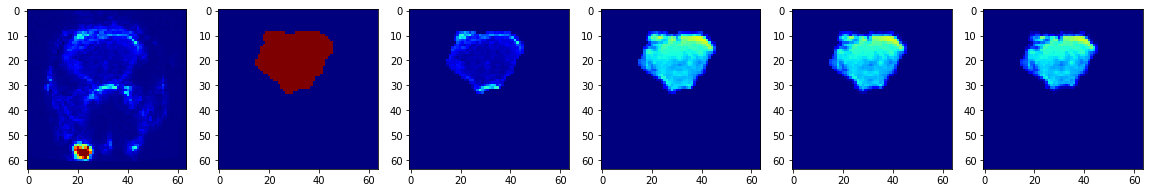

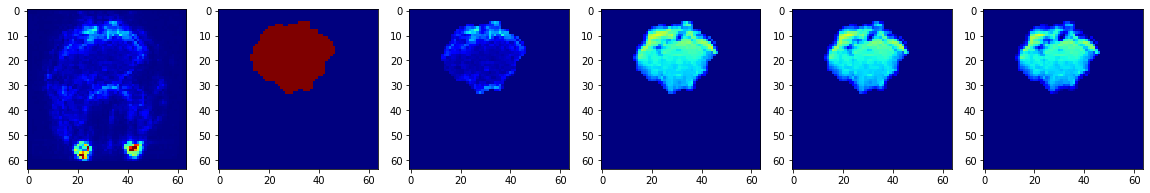

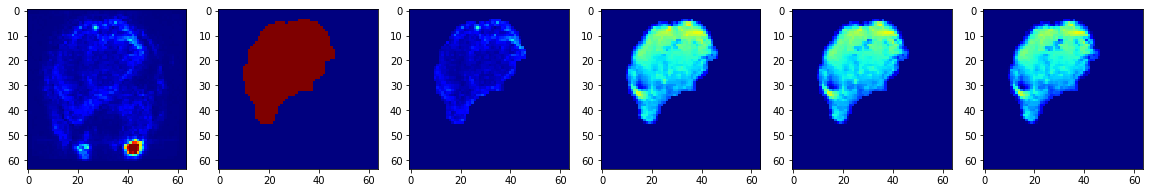

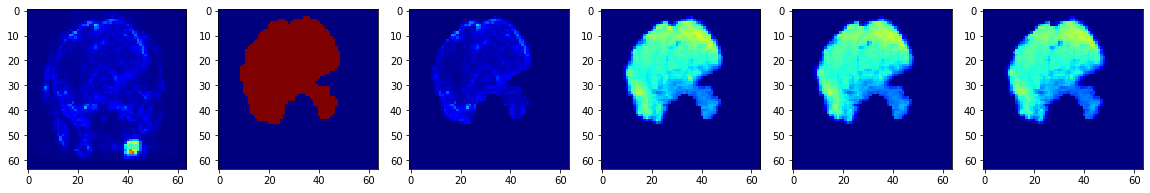

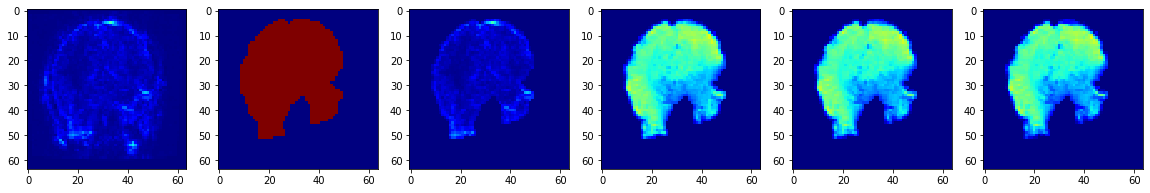

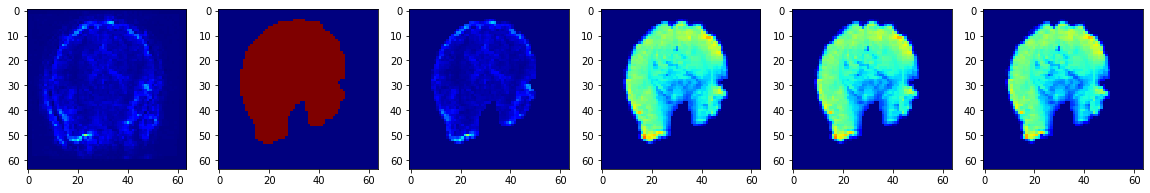

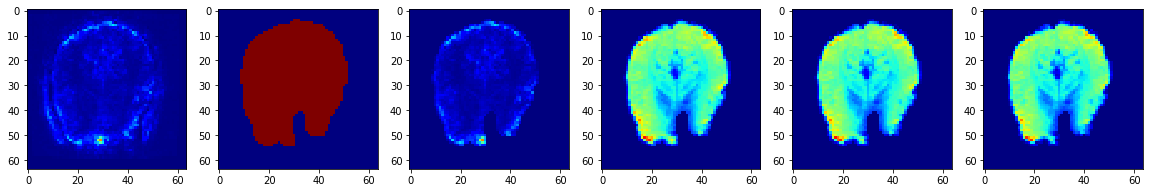

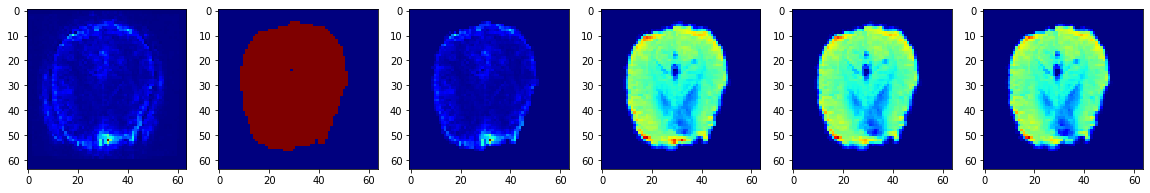

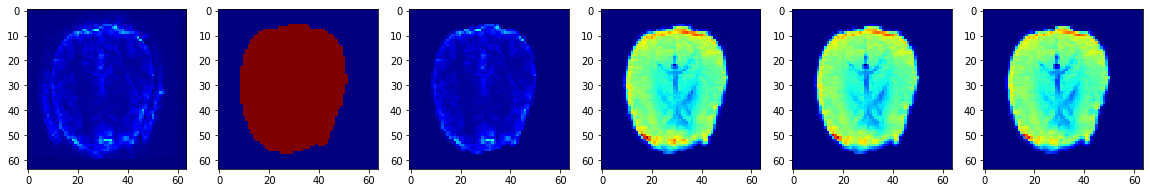

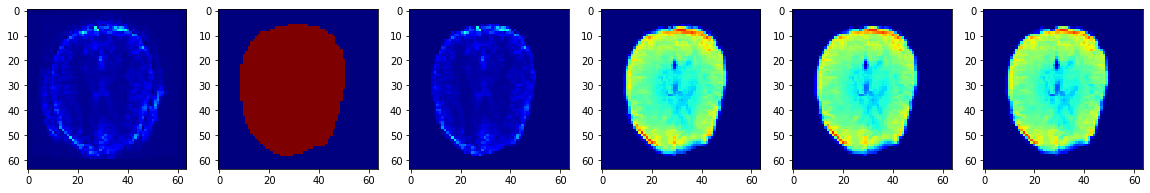

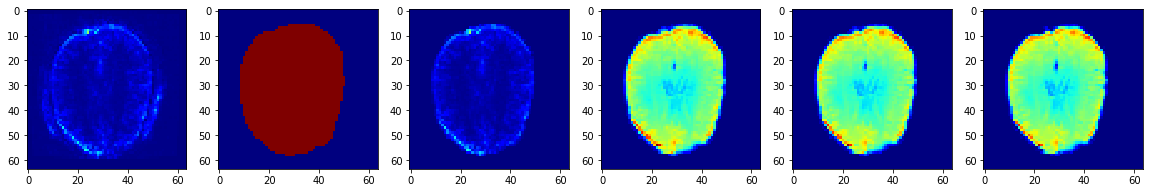

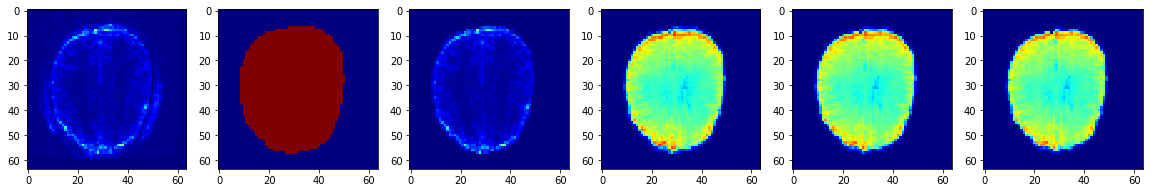

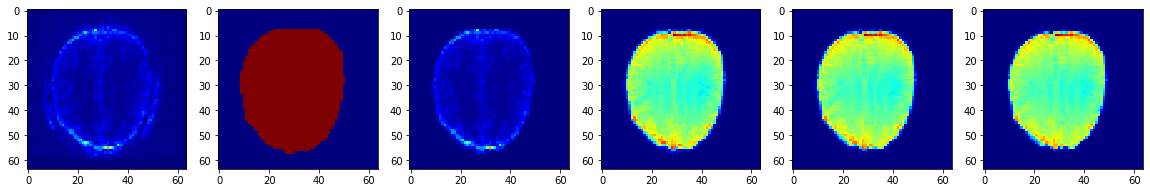

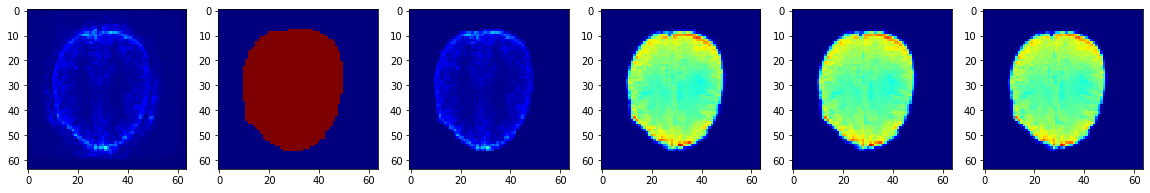

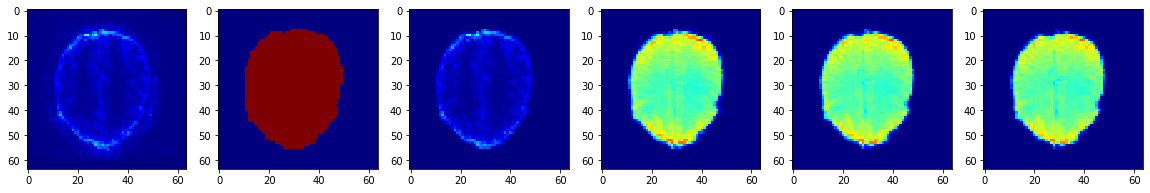

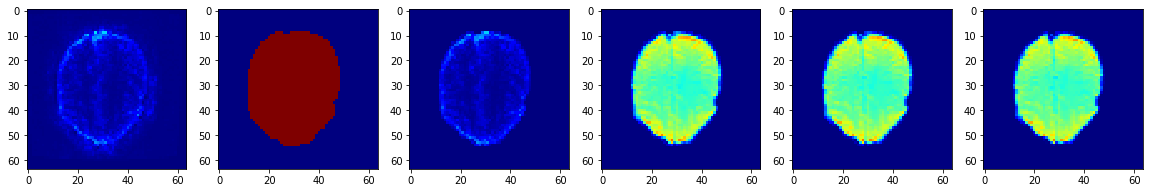

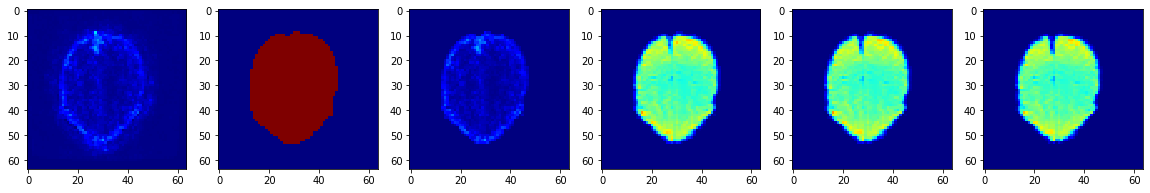

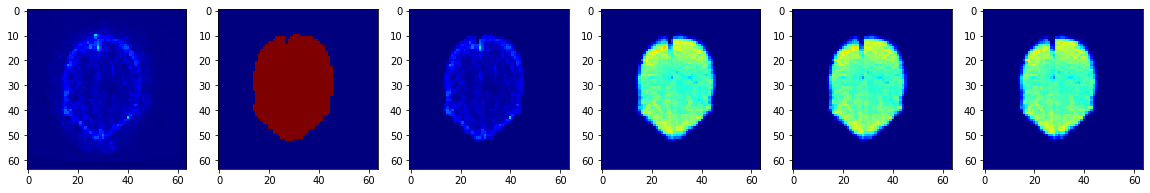

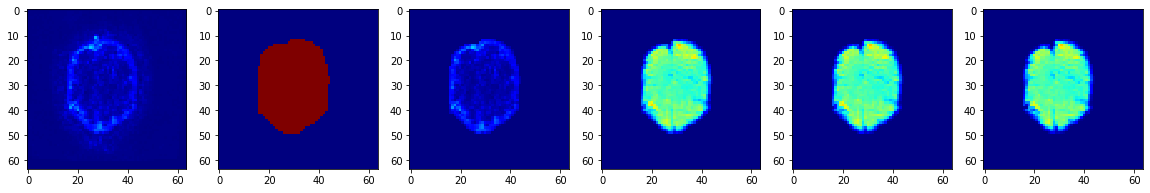

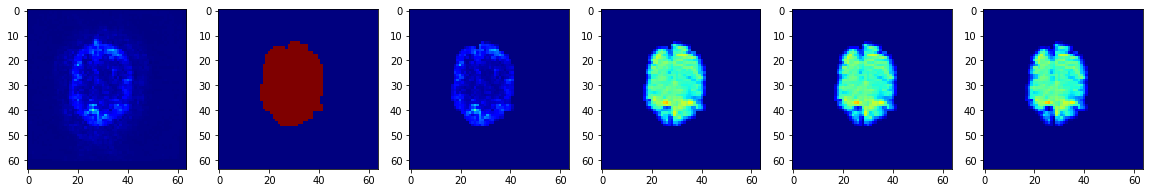

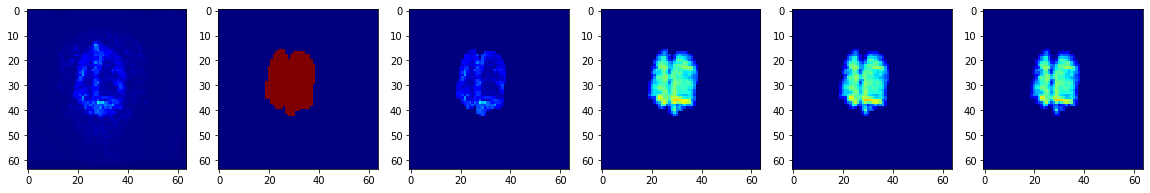

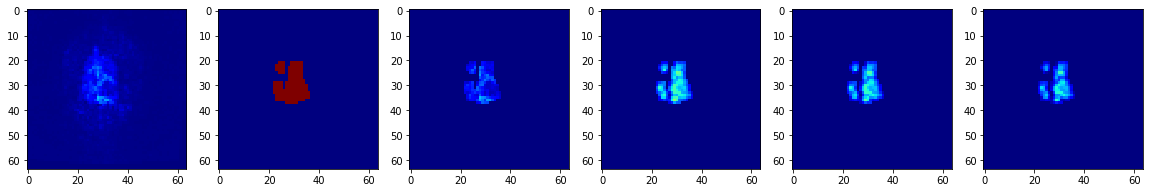

In [167]:
brain_range = nii_range * v_mask
brain_max = nii_max * v_mask
brain_med = nii_med * v_mask
brain_min = nii_min * v_mask

range_max = brain_range.max()
range_min = brain_range.min()
max_max = brain_max.max()
max_min = brain_max.min()
med_max = brain_med.max()
med_min = brain_med.min()
min_max = brain_min.max()
min_min = brain_min.min()
for i in range(brain_range.shape[-1]):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes[0].imshow(nii_range[:,:,i].T, vmin=range_min, vmax=range_max, cmap='jet')
    axes[1].imshow(v_mask[:,:,i].T, cmap='jet')
    axes[2].imshow(brain_range[:,:,i].T, vmin=range_min, vmax=range_max, cmap='jet')
    axes[3].imshow(brain_max[:,:,i].T, vmin=max_min, vmax=max_max, cmap='jet')
    axes[4].imshow(brain_med[:,:,i].T, vmin=med_min, vmax=med_max, cmap='jet')
    axes[5].imshow(brain_min[:,:,i].T, vmin=min_min, vmax=min_max, cmap='jet')
    plt.show()
plt.close()